<a href="https://colab.research.google.com/github/rizky-gumelar/Comparison-of-ML-and-DL-in-Corrosion-Inhibitor/blob/main/Virtual%20Sampling%20Dataset%20with%20KDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# KDE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from numpy import mean
from numpy import sqrt
from scipy.stats import spearmanr

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# func

In [ ]:
data = pd.read_excel('/content/N-Heterocyclic.xlsx')
# data['IE (%)'] = data['IE (%)']/100

# Virtual Sampling menggunakan KDE
def generate_virtual_samples(data, n_samples):
    kde = KernelDensity(kernel='tophat', bandwidth=0.02).fit(data)
    data_virtual = kde.sample(n_samples=n_samples)
    return data_virtual

def load_feature(data):
    # Berdasarkan pengetahuan domain atau eksplorasi, kita pilih beberapa fitur
    selected_features = ['Global Hardness', 'Global Softness', 'Electrophilicity']

    # x = data[selected_features]
    # x = data.drop(columns=['Global Hardness','IE (%)','Electron Affinity', 'Electronegativity', 'Gap Energy', 'Ionization Potential'])
    x = data.drop(columns=['IE (%)'])
    y = data['IE (%)'].values

    return x,y

# Custom RMSE metric
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))


# Prepare the storage for R^2 scores
scores = {}

def add_score(model_name, score):
    if model_name not in scores:
        scores[model_name] = []
    scores[model_name].append(score)

In [ ]:
# Prepare the storage for R^2 scores
scoresR2 = {}

def add_scoreR2(model_name, score):
    if model_name not in scoresR2:
        scoresR2[model_name] = []
    scoresR2[model_name].append(score)

In [ ]:
data.head()

HOMO   LUMO  Gap Energy  Dipole Moment  Ionization Potential  \
0 -6.120 -1.852       4.268          3.425                 6.996   
1 -6.034 -1.788       4.246          2.976                 6.749   
2 -6.048 -1.809       4.239          3.872                 7.561   
3 -6.091 -1.710       4.381          4.252                 6.928   
4 -5.954 -1.728       4.226          2.437                 6.525   

   Electron Affinity  Electronegativity  Global Hardness  Global Softness  \
0              1.446              4.221            2.775            0.360   
1              1.404              4.076            2.673            0.374   
2              1.427              4.494            3.067            0.326   
3              1.321              4.125            2.804            0.357   
4              1.366              3.946            2.579            0.388   

   Electrophilicity  Fraction of electron transferred  IE (%)  
0             3.211                             0.501    13.0  
1             3.109                             0.547    19.0  
2             3.292                             0.409    14.0  
3             3.034                             0.513    24.0  
4             3.018                             0.592    26.0

In [ ]:
data.astype(np.float64)
data.isnull().sum()

HOMO                                0
LUMO                                0
Gap Energy                          0
Dipole Moment                       0
Ionization Potential                0
Electron Affinity                   0
Electronegativity                   0
Global Hardness                     0
Global Softness                     0
Electrophilicity                    0
Fraction of electron transferred    0
IE (%)                              0
dtype: int64

In [ ]:
data = pd.read_excel('/content/N-Heterocyclic.xlsx')
# data['IE (%)'] = data['IE (%)']/100

# No KDE

Random Forest

In [ ]:
# Without KDE

# Without KDE

# data = pd.read_excel('/content/N-Heterocyclic.xlsx')
# data['IE (%)'] = data['IE (%)']/100
x = data.drop(columns='IE (%)')
y = data['IE (%)'].values

x = RobustScaler().fit_transform(x)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
for train, test in kfold.split(x, y):
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]
    rf = RandomForestRegressor()
    rf.fit(x[train], y[train])
    y_pred_train_rf = rf.predict(x[train])
    y_pred_test_rf = rf.predict(x[test])

print('Training')
print('R^2 :', r2_score(y_train, y_pred_train_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train_rf)))
print('================================')
print('Hasil Testing')
print('R^2 :', r2_score(y_test, y_pred_test_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test_rf)))

Training
R^2 : 0.9365082353127967
RMSE: 0.051920741216528635
Hasil Testing
R^2 : 0.7911349513951286
RMSE: 0.10309681493254594


In [ ]:
# Without KDE

# Without KDE

# data = pd.read_excel('/content/N-Heterocyclic.xlsx')
x = data.drop(columns='IE (%)')
y = data['IE (%)'].values

# x = MinMaxScaler().fit_transform(x)
x = RobustScaler().fit_transform(x)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
for train, test in kfold.split(x, y):
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]
    model = KNeighborsRegressor()
    model.fit(x[train], y[train])
    y_pred_train = model.predict(x[train])
    y_pred_test = model.predict(x[test])

print('Training')
print('R^2 :', r2_score(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('================================')
print('Hasil Testing')
print('R^2 :', r2_score(y_test, y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

Training
R^2 : 0.7204950804609507
RMSE: 0.10893737670528225
Hasil Testing
R^2 : 0.740222433432432
RMSE: 0.11497758564172408


##Linier

Evaluating model: LinearRegression
LinearRegression Fold-1:
RMSE: 15.226363091581824
R^2: 0.2312945561419124
------------------


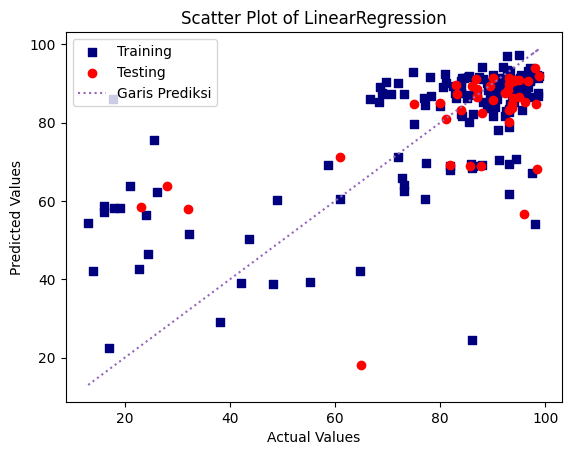

LinearRegression Fold-2:
RMSE: 18.057536661884676
R^2: 0.12338882995092826
------------------


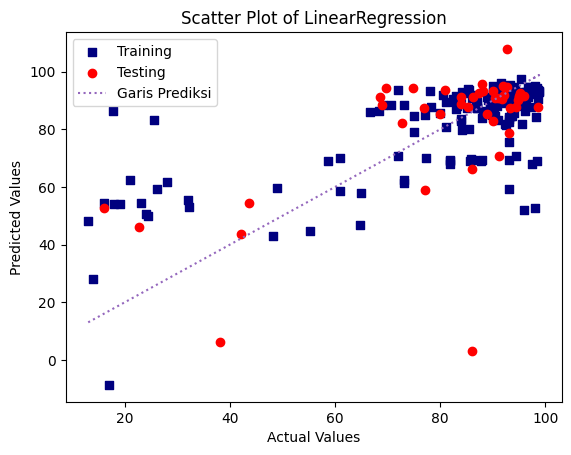

LinearRegression Fold-3:
RMSE: 18.926364197316744
R^2: 0.3968325317190553
------------------


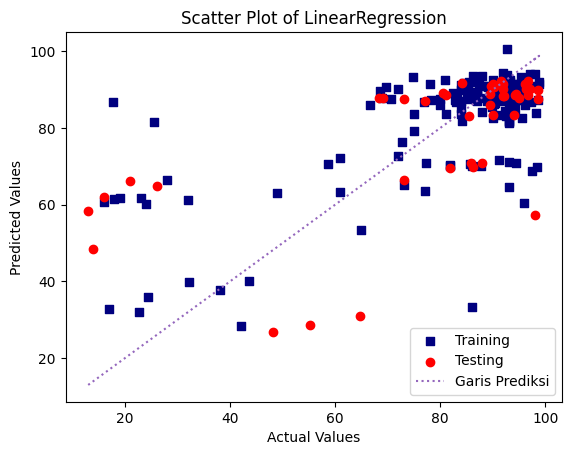

LinearRegression Fold-4:
RMSE: 18.043156137684484
R^2: 0.24289303622011238
------------------


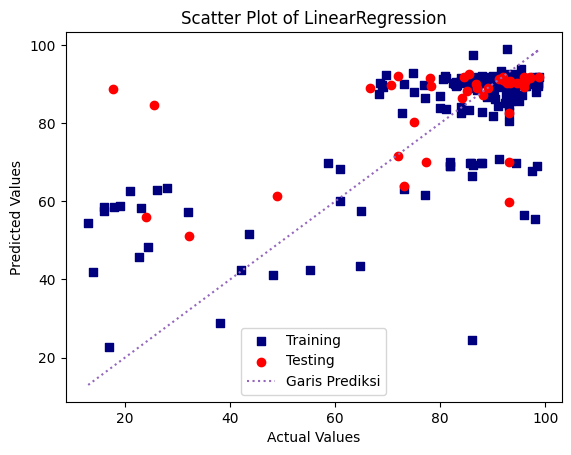

LinearRegression Fold-5:
RMSE: 13.538295772594994
R^2: 0.6211173581667624
------------------


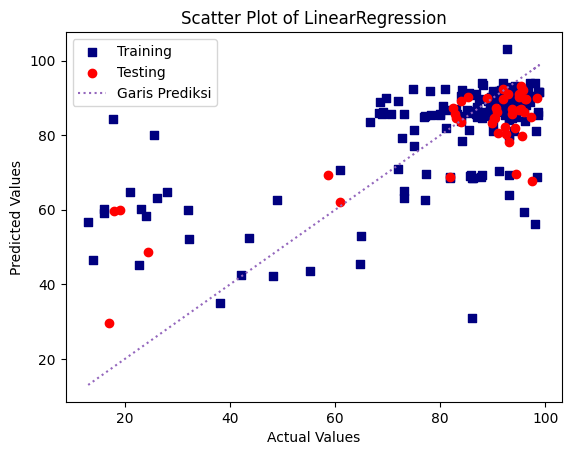

Summary for LinearRegression:
Training
R^2 : 0.42415447027191755
RMSE: 15.732122174035556
Hasil Testing
R^2 : 0.6211173581667624
RMSE: 13.538295772594994


Evaluating model: RidgeRegression
RidgeRegression Fold-1:
RMSE: 13.867689889601776
R^2: 0.3623595851354632
------------------


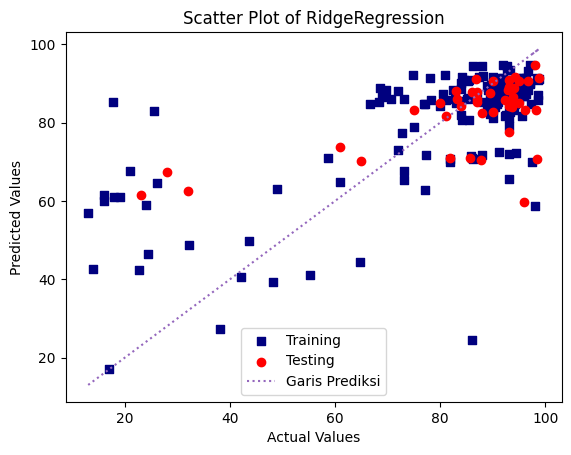

RidgeRegression Fold-2:
RMSE: 17.667415354735372
R^2: 0.16085689922957624
------------------


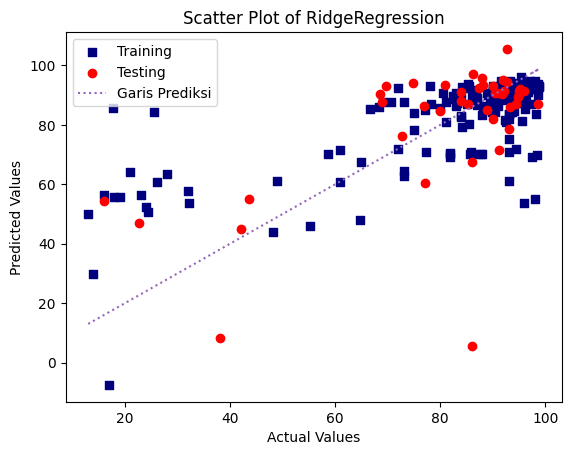

RidgeRegression Fold-3:
RMSE: 19.01604491792125
R^2: 0.39110288934058357
------------------


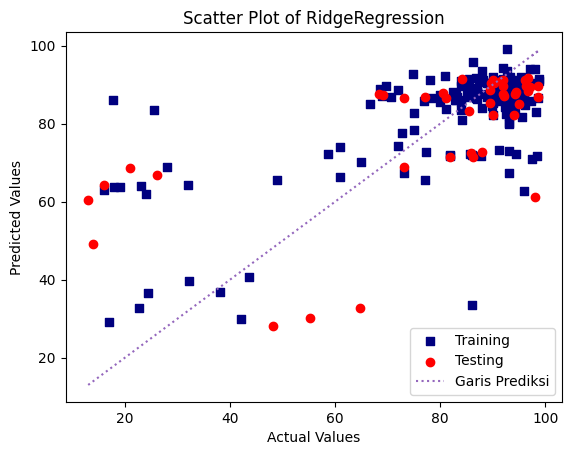

RidgeRegression Fold-4:
RMSE: 17.926150264869822
R^2: 0.25268054016508223
------------------


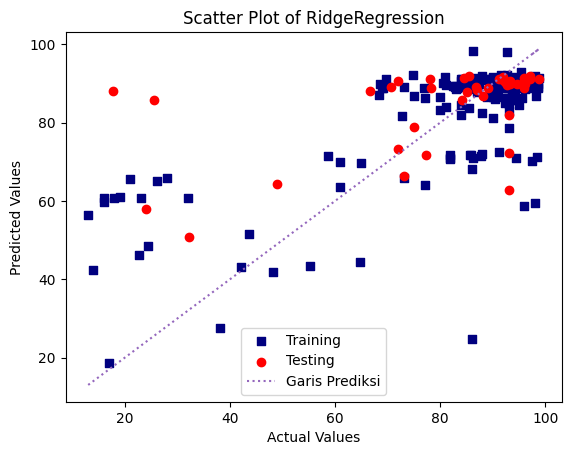

RidgeRegression Fold-5:
RMSE: 13.746480348253167
R^2: 0.6093752613410841
------------------


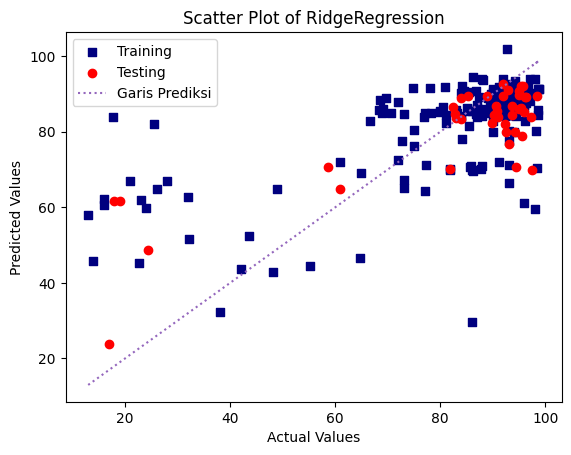

Summary for RidgeRegression:
Training
R^2 : 0.4178477639810354
RMSE: 15.818037307323847
Hasil Testing
R^2 : 0.6093752613410841
RMSE: 13.746480348253167


Evaluating model: LassoRegression
LassoRegression Fold-1:
RMSE: 15.397046856656397
R^2: 0.2139639658461946
------------------


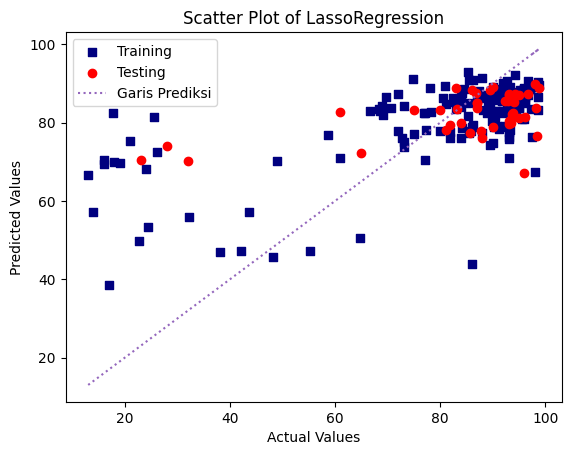

LassoRegression Fold-2:
RMSE: 15.41974591569717
R^2: 0.36078872805311946
------------------


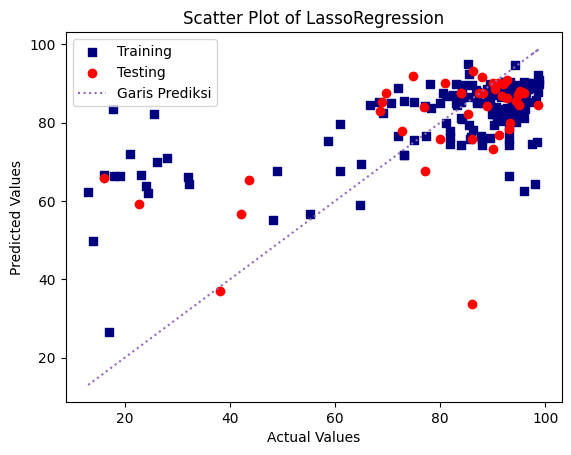

LassoRegression Fold-3:
RMSE: 20.758552223101113
R^2: 0.27439937854088503
------------------


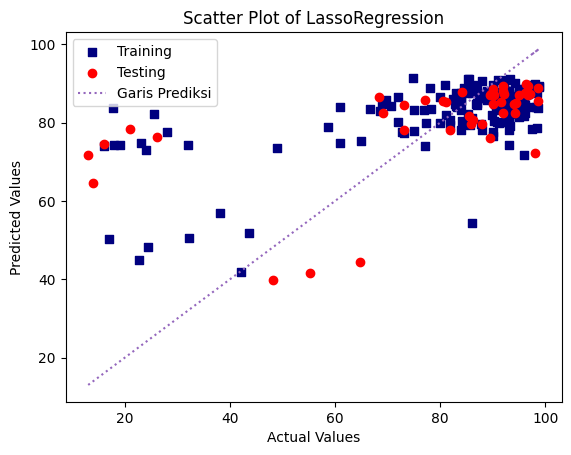

LassoRegression Fold-4:
RMSE: 18.290478091772414
R^2: 0.2219950838433321
------------------


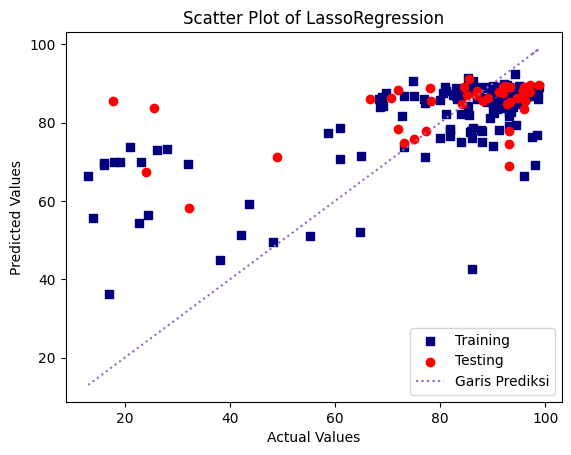

LassoRegression Fold-5:
RMSE: 16.603227098133754
R^2: 0.4301484558464088
------------------


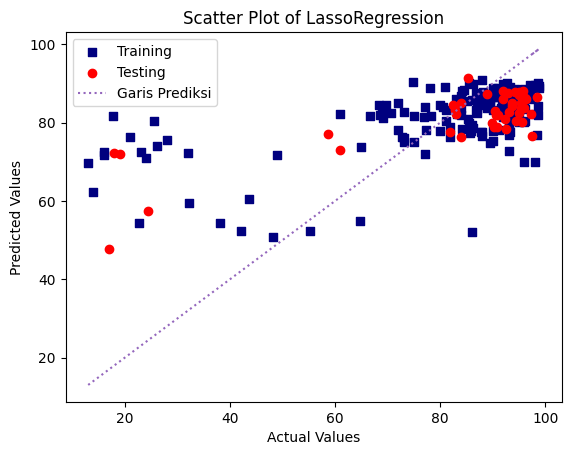

Summary for LassoRegression:
Training
R^2 : 0.32260877788079323
RMSE: 17.062949005880785
Hasil Testing
R^2 : 0.4301484558464088
RMSE: 16.603227098133754


Evaluating model: ElasticNet
ElasticNet Fold-1:
RMSE: 17.345925348245604
R^2: 0.0023859914309178887
------------------


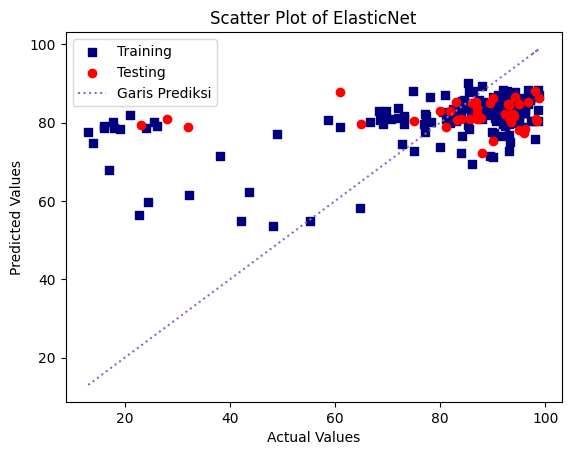

ElasticNet Fold-2:
RMSE: 16.32448966641525
R^2: 0.28357750084972133
------------------


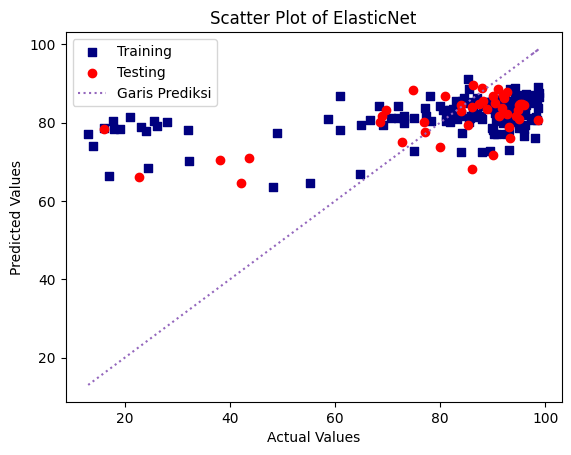

ElasticNet Fold-3:
RMSE: 22.999682600812495
R^2: 0.10926768268983178
------------------


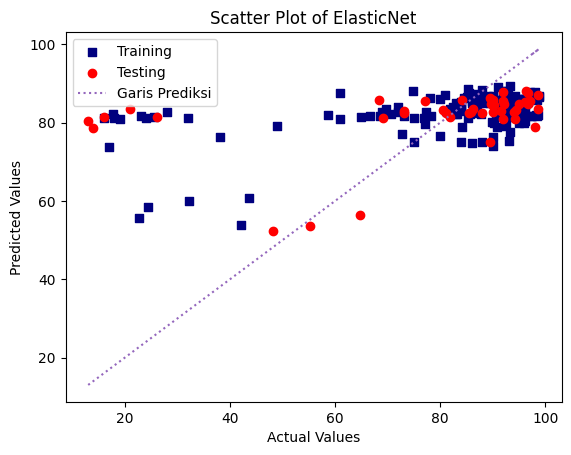

ElasticNet Fold-4:
RMSE: 19.195127126912407
R^2: 0.14313143309336174
------------------


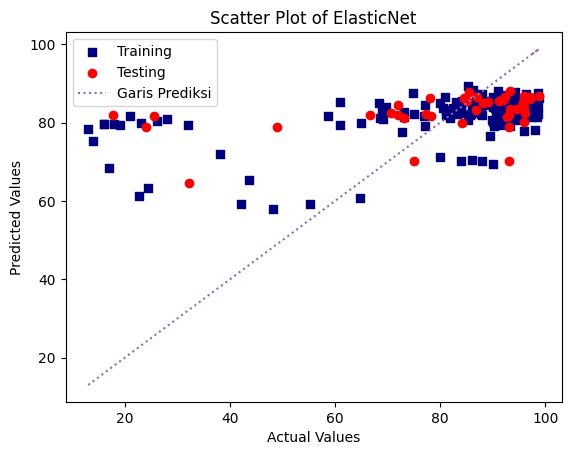

ElasticNet Fold-5:
RMSE: 19.919240263782
R^2: 0.17979530083529283
------------------


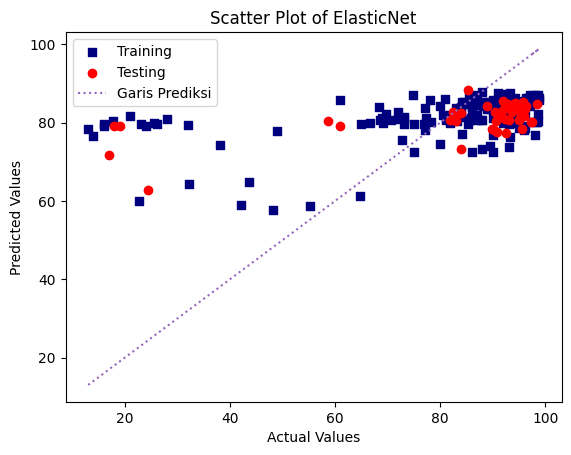

Summary for ElasticNet:
Training
R^2 : 0.1770690858035805
RMSE: 18.806847336525607
Hasil Testing
R^2 : 0.17979530083529283
RMSE: 19.919240263782




In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

# Definisikan model-model yang akan dijalankan

models = {
    'LinearRegression': LinearRegression(),
    'RidgeRegression': Ridge(),
    'LassoRegression': Lasso(),
    'ElasticNet': ElasticNet(),
    # 'HuberRegressor': HuberRegressor()
}


# # Buat virtual samples
# data_virtual = generate_virtual_samples(data, n_samples=1000)

# # Concate data
# data_virtual = pd.DataFrame(np.column_stack([data_virtual]), columns=list(data.columns))
# data_new_kde = np.concatenate((data, data_virtual))
# data_new_kde = pd.DataFrame(np.column_stack([data_new_kde]), columns=list(data.columns))


# List untuk menyimpan skor MSE dan R2 pada setiap iterasi
x_combined, y_combined = load_feature(data)

# Normalisasi data menggunakan RobustScaler
x_combined = RobustScaler().fit_transform(x_combined)

# KFold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop untuk setiap model
for model_name, model in models.items():
    mse_scores = []
    r2_scores = []

    print(f"Evaluating model: {model_name}")

    for train, test in kfold.split(x_combined, y_combined):
        x_train, x_test = x_combined[train], x_combined[test]
        y_train, y_test = y_combined[train], y_combined[test]

        # Training model
        model.fit(x_train, y_train)
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        # Hitung skor MSE
        mse = mean_squared_error(y_test, y_pred_test)
        mse_scores.append(mse)

        # Hitung skor R^2 (koefisien determinasi)
        r2 = r2_score(y_test, y_pred_test)
        r2_scores.append(r2)

        # Cetak skor MSE dan R^2
        print(f"{model_name} Fold-{len(mse_scores)}:")
        print(f"RMSE: {np.sqrt(mse)}")
        print(f"R^2: {r2}")
        print("------------------")

        #Buat visualisasi hasil prediksi
        plt.scatter(y_train, y_pred_train, color='#00007f', marker='s', label='Training')
        plt.scatter(y_test, y_pred_test, color='#ff0000', marker='o', label='Testing')
        plt.plot(y_combined, y_combined, color='#9467bd', linestyle='dotted', label='Garis Prediksi')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Scatter Plot of {model_name}')
        plt.legend()
        plt.show()

    # Summary hasil training dan testing untuk model ini
    print(f'Summary for {model_name}:')
    print('Training')
    print('R^2 :', r2_score(y_train, y_pred_train))
    print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print('================================')
    print('Hasil Testing')
    print('R^2 :', r2_score(y_test, y_pred_test))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print('================================\n\n')

    add_scoreR2(model_name, r2_score(y_test, y_pred_test))

##Non-Linier

Evaluating model: KNeighborsRegressor
KNeighborsRegressor Fold-1:
RMSE: 8.044449017801035
R^2: 0.7854343481994677
------------------


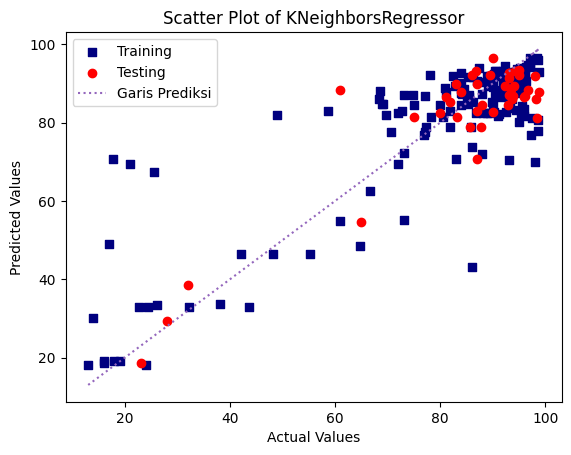

KNeighborsRegressor Fold-2:
RMSE: 12.437357147649246
R^2: 0.5841409080843917
------------------


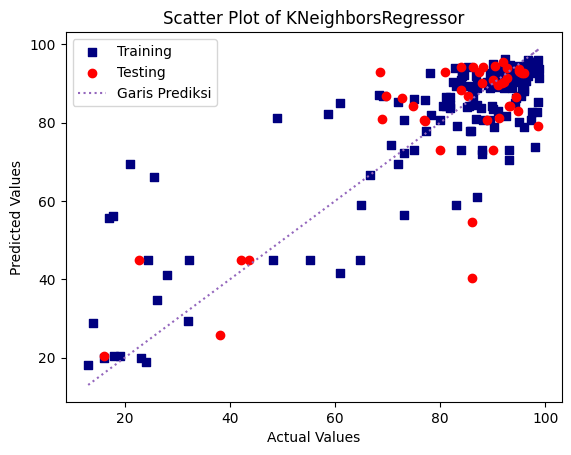

KNeighborsRegressor Fold-3:
RMSE: 12.962322101873848
R^2: 0.7170764216833743
------------------


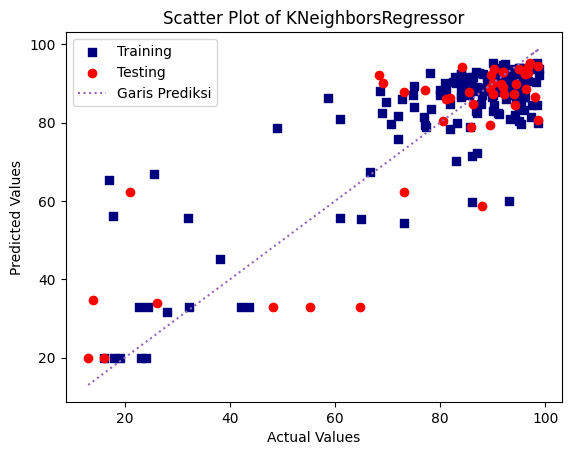

KNeighborsRegressor Fold-4:
RMSE: 16.777027266681568
R^2: 0.3454207308803905
------------------


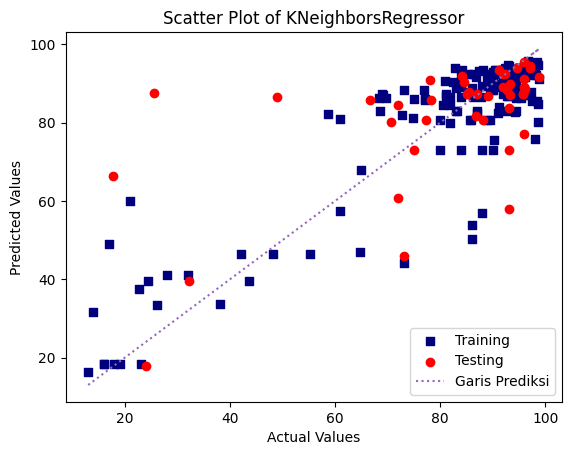

KNeighborsRegressor Fold-5:
RMSE: 11.541359325043453
R^2: 0.72464647670396
------------------


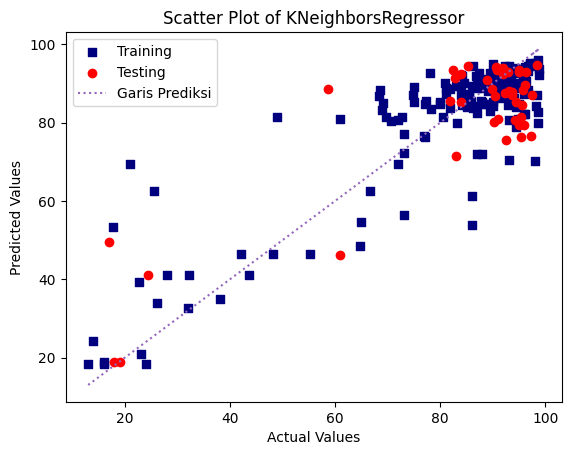

Summary for KNeighborsRegressor:
Training
R^2 : 0.7622954719523397
RMSE: 10.107716163124374
Hasil Testing
R^2 : 0.72464647670396
RMSE: 11.541359325043453


Evaluating model: RandomForestRegressor
RandomForestRegressor Fold-1:
RMSE: 9.965151957772138
R^2: 0.6707426760230054
------------------


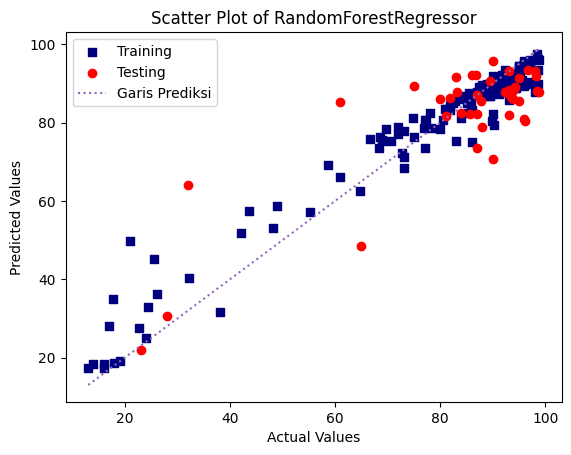

RandomForestRegressor Fold-2:
RMSE: 12.511274974879472
R^2: 0.579183143263317
------------------


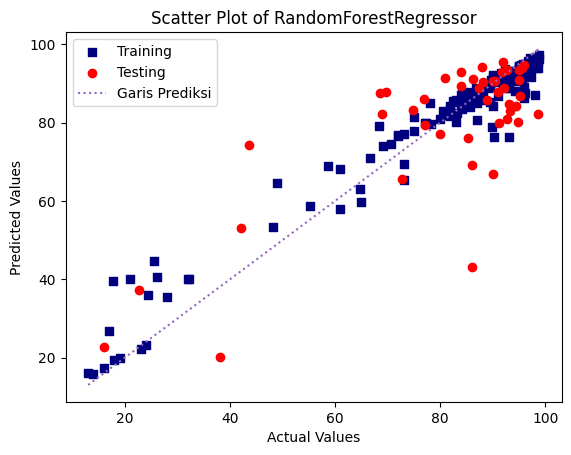

RandomForestRegressor Fold-3:
RMSE: 12.78869752575402
R^2: 0.7246049337783521
------------------


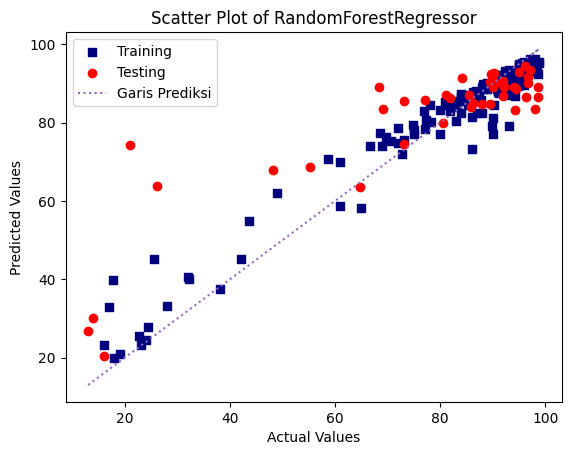

RandomForestRegressor Fold-4:
RMSE: 16.00976597285324
R^2: 0.40392323527170393
------------------


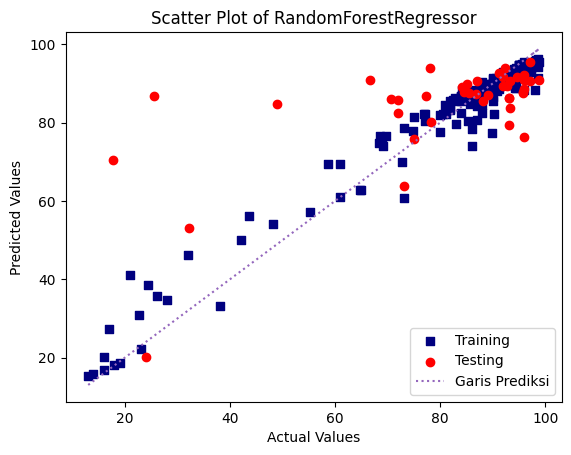

RandomForestRegressor Fold-5:
RMSE: 13.741685854151445
R^2: 0.6096476978269787
------------------


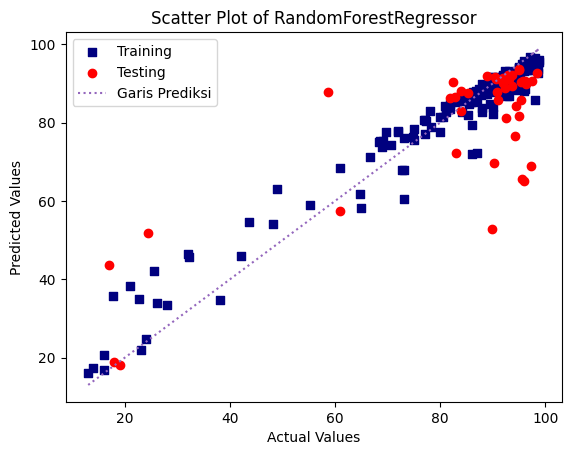

Summary for RandomForestRegressor:
Training
R^2 : 0.9431825931062608
RMSE: 4.941684505032926
Hasil Testing
R^2 : 0.6096476978269787
RMSE: 13.741685854151445


Evaluating model: GradientBoostingRegressor
GradientBoostingRegressor Fold-1:
RMSE: 10.25193236400816
R^2: 0.6515190375216087
------------------


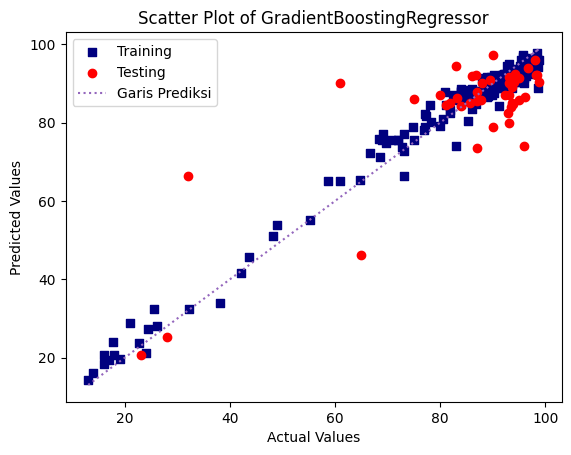

GradientBoostingRegressor Fold-2:
RMSE: 11.697129838346132
R^2: 0.6321687602256887
------------------


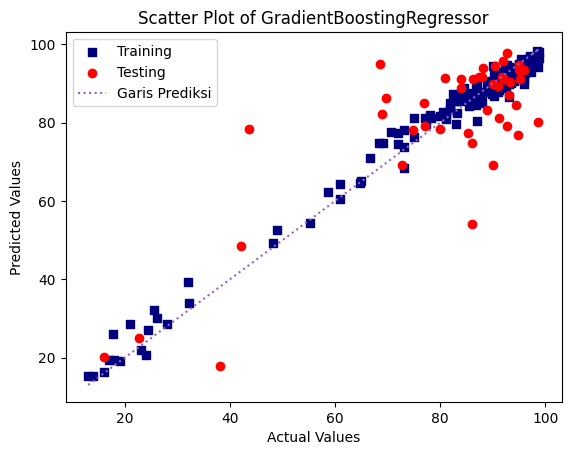

GradientBoostingRegressor Fold-3:
RMSE: 14.413000859129843
R^2: 0.650206005342232
------------------


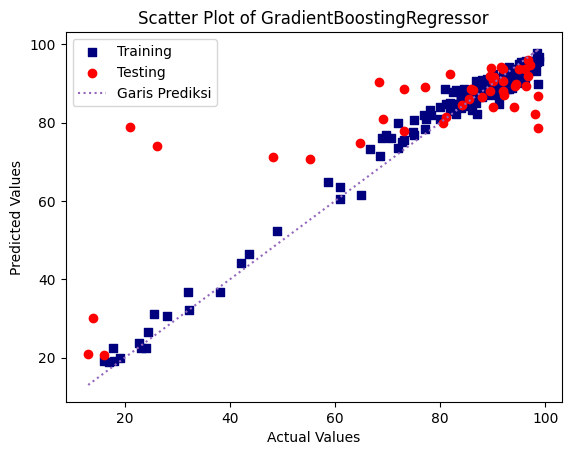

GradientBoostingRegressor Fold-4:
RMSE: 14.544097628129032
R^2: 0.5080671910436265
------------------


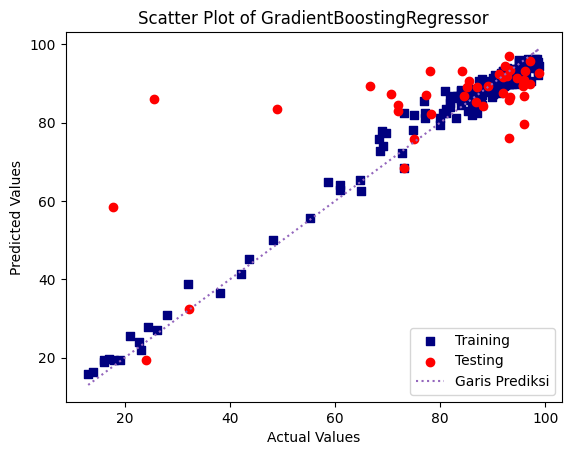

GradientBoostingRegressor Fold-5:
RMSE: 11.83866433072163
R^2: 0.710277564847291
------------------


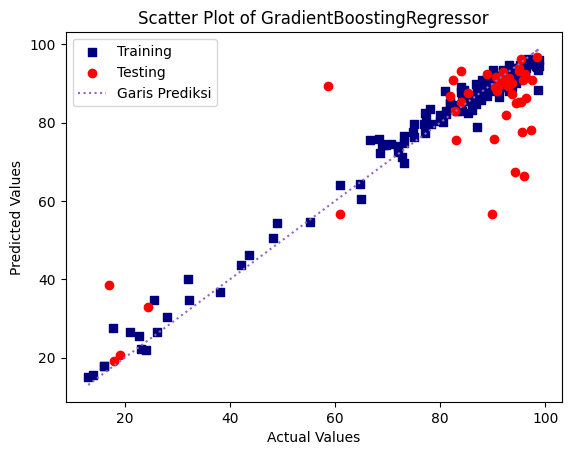

Summary for GradientBoostingRegressor:
Training
R^2 : 0.9781890957600184
RMSE: 3.0617600076736764
Hasil Testing
R^2 : 0.710277564847291
RMSE: 11.83866433072163


Evaluating model: AdaBoostRegressor
AdaBoostRegressor Fold-1:
RMSE: 11.428631216475292
R^2: 0.5669320632511481
------------------


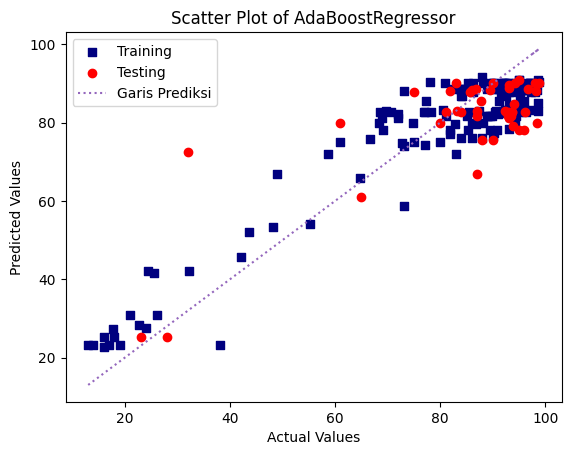

AdaBoostRegressor Fold-2:
RMSE: 10.582767255424463
R^2: 0.6989154437576369
------------------


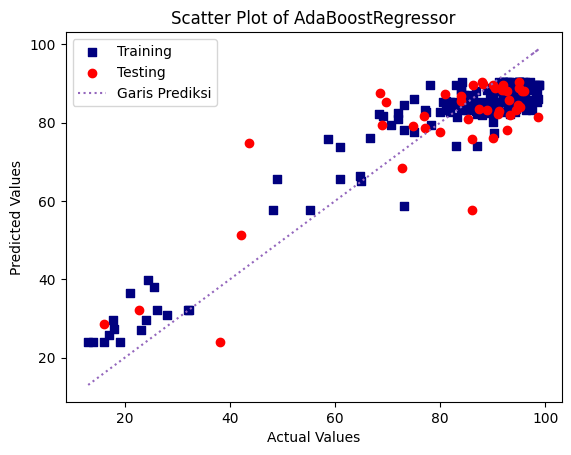

AdaBoostRegressor Fold-3:
RMSE: 14.379002948289235
R^2: 0.6518542726538502
------------------


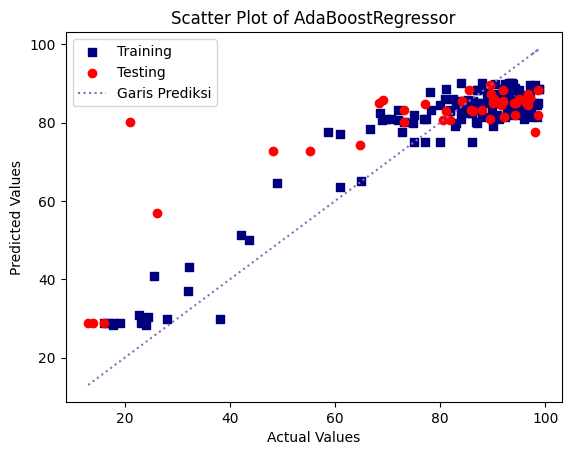

AdaBoostRegressor Fold-4:
RMSE: 16.21438602782833
R^2: 0.38858900712312927
------------------


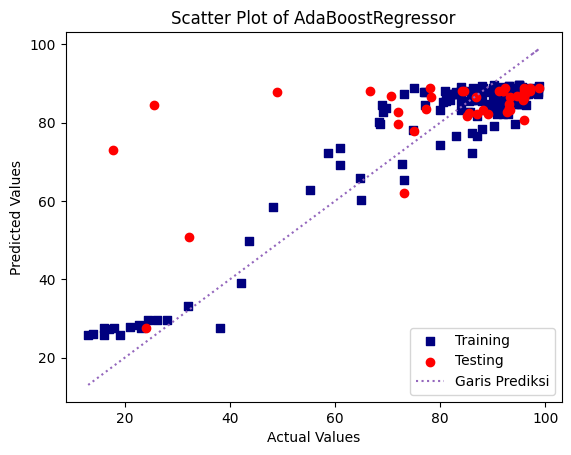

AdaBoostRegressor Fold-5:
RMSE: 12.086385731099849
R^2: 0.6980259567939405
------------------


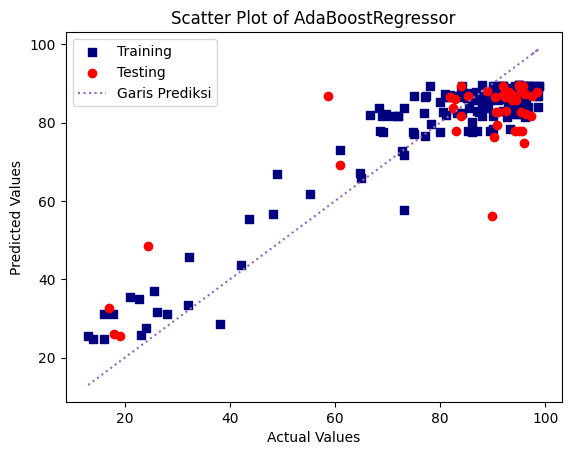

Summary for AdaBoostRegressor:
Training
R^2 : 0.8495903083260921
RMSE: 8.040299399888196
Hasil Testing
R^2 : 0.6980259567939405
RMSE: 12.086385731099849


Evaluating model: XGBRegressor
XGBRegressor Fold-1:
RMSE: 11.22940151140366
R^2: 0.5818993777655219
------------------


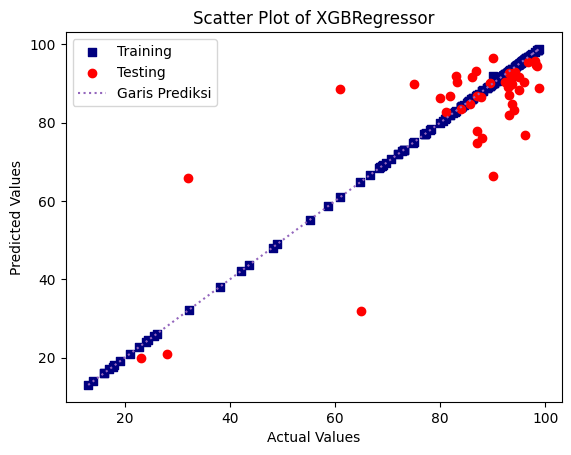

XGBRegressor Fold-2:
RMSE: 14.37405166592704
R^2: 0.44454562371711404
------------------


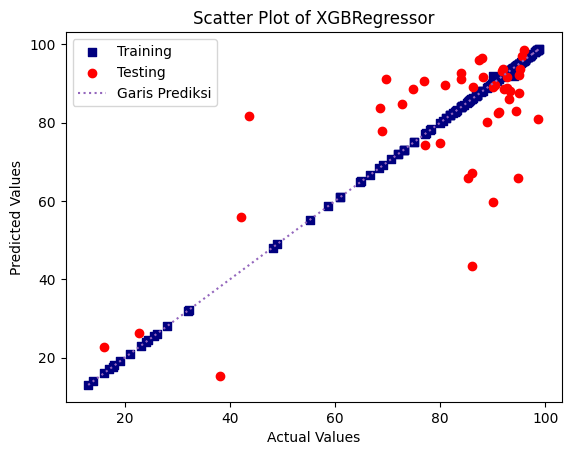

XGBRegressor Fold-3:
RMSE: 15.063717716998521
R^2: 0.6179080732422215
------------------


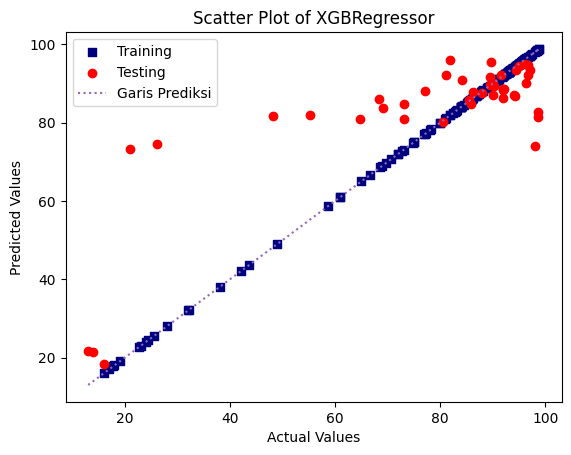

XGBRegressor Fold-4:
RMSE: 15.958308978446425
R^2: 0.4077487786113604
------------------


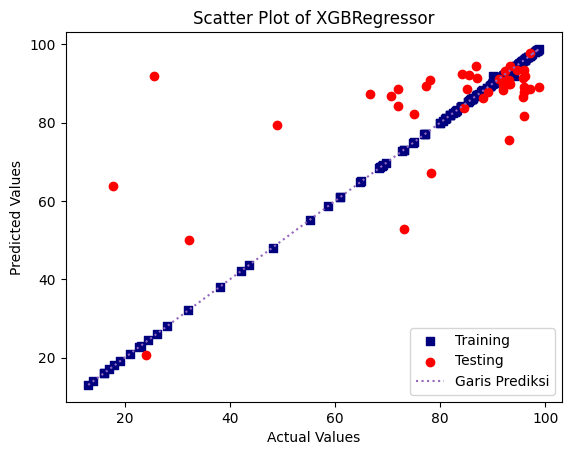

XGBRegressor Fold-5:
RMSE: 14.354847445658601
R^2: 0.5740350394650575
------------------


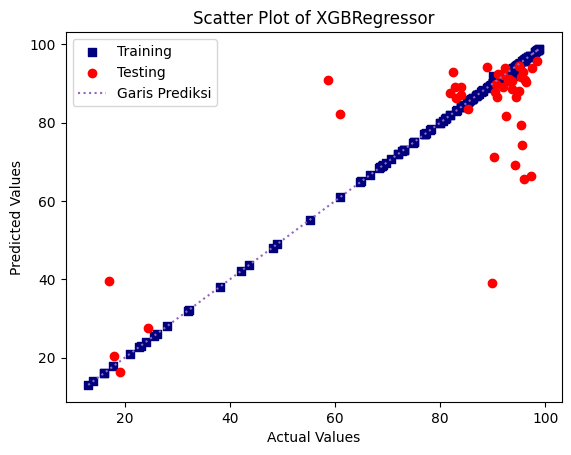

Summary for XGBRegressor:
Training
R^2 : 0.9998936144782133
RMSE: 0.21383341632636438
Hasil Testing
R^2 : 0.5740350394650575
RMSE: 14.354847445658601




In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from xgboost import XGBRegressor

models = {
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'XGBRegressor': XGBRegressor(),
    # 'BaggingRegressor': BaggingRegressor()
}


# # Buat virtual samples
# data_virtual = generate_virtual_samples(data, n_samples=1000)

# # Concate data
# data_virtual = pd.DataFrame(np.column_stack([data_virtual]), columns=list(data.columns))
# data_new_kde = np.concatenate((data, data_virtual))
# data_new_kde = pd.DataFrame(np.column_stack([data_new_kde]), columns=list(data.columns))


# List untuk menyimpan skor MSE dan R2 pada setiap iterasi
x_combined, y_combined = load_feature(data)

# Normalisasi data menggunakan RobustScaler
x_combined = RobustScaler().fit_transform(x_combined)

# KFold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# # Prepare the storage for R^2 scores
# scores = {name: [] for name in models.keys()}

for model_name, model in models.items():
    mse_scores = []
    r2_scores = []

    print(f"Evaluating model: {model_name}")

    for train, test in kfold.split(x_combined, y_combined):
        x_train, x_test = x_combined[train], x_combined[test]
        y_train, y_test = y_combined[train], y_combined[test]

        # Training model
        model.fit(x_train, y_train)
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        # Hitung skor MSE
        mse = mean_squared_error(y_test, y_pred_test)
        mse_scores.append(mse)

        # Hitung skor R^2 (koefisien determinasi)
        r2 = r2_score(y_test, y_pred_test)
        r2_scores.append(r2)
        # scores[model_name].append(r2)
        add_score(model_name, r2)

        # Cetak skor MSE dan R^2
        print(f"{model_name} Fold-{len(mse_scores)}:")
        print(f"RMSE: {np.sqrt(mse)}")
        print(f"R^2: {r2}")
        print("------------------")

        #Buat visualisasi hasil prediksi
        plt.scatter(y_train, y_pred_train, color='#00007f', marker='s', label='Training')
        plt.scatter(y_test, y_pred_test, color='#ff0000', marker='o', label='Testing')
        plt.plot(y_combined, y_combined, color='#9467bd', linestyle='dotted', label='Garis Prediksi')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Scatter Plot of {model_name}')
        plt.legend()
        plt.show()

    # Summary hasil training dan testing untuk model ini
    print(f'Summary for {model_name}:')
    print('Training')
    print('R^2 :', r2_score(y_train, y_pred_train))
    print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print('================================')
    print('Hasil Testing')
    print('R^2 :', r2_score(y_test, y_pred_test))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print('================================\n\n')

    add_scoreR2(model_name, r2_score(y_test, y_pred_test))

# KDE

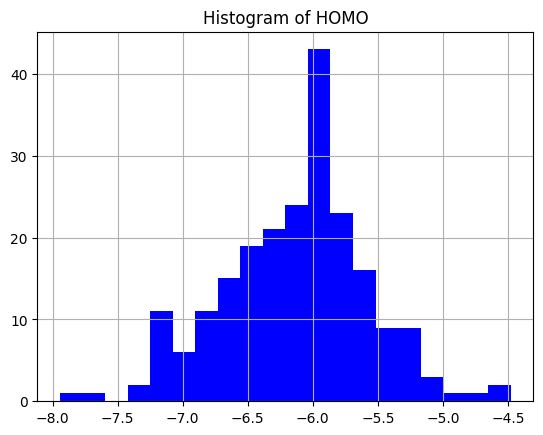

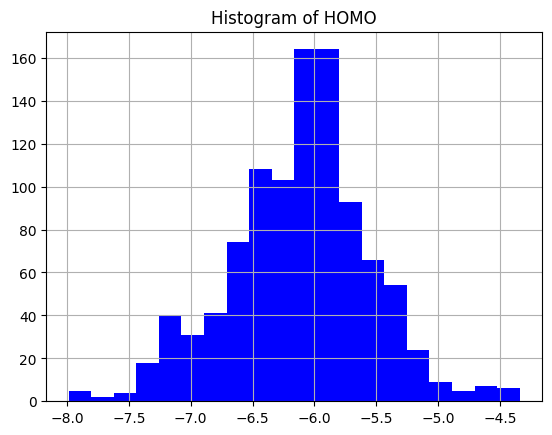

In [ ]:
plt.hist(data['HOMO'], bins=20, color='blue', alpha=1)  # Customize the number of bins and color
plt.title('Histogram of HOMO')
# plt.xlabel('Values')
# plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.hist(data_new_kde['HOMO'], bins=20, color='blue', alpha=1)  # Customize the number of bins and color
plt.title('Histogram of HOMO')
# plt.xlabel('Values')
# plt.ylabel('Frequency')
plt.grid(True)
plt.show()

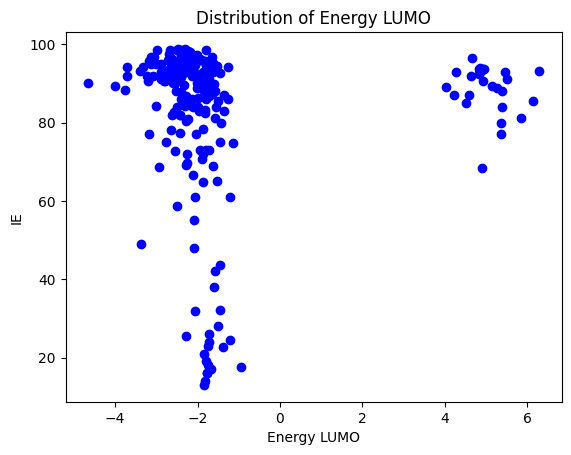

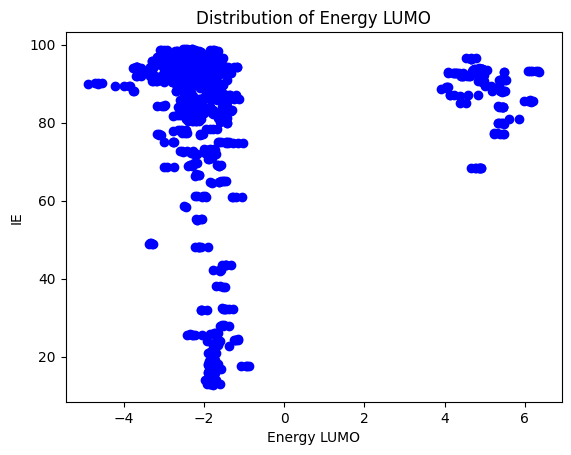

In [ ]:
import matplotlib.pyplot as plt
xxx ='LUMO'

# Contoh data
energy_lumo = data[xxx]
ie = data['IE (%)']

# Membuat plot scatter
plt.scatter(energy_lumo, ie, color='blue')

# Menambahkan judul dan label sumbu
plt.title('Distribution of Energy LUMO')
plt.xlabel('Energy LUMO')
plt.ylabel('IE')
plt.show()


# Contoh data
energy_lumo = data_new_kde[xxx]
ie = data_new_kde['IE (%)']

# Membuat plot scatter
plt.scatter(energy_lumo, ie, color='blue')

# Menambahkan judul dan label sumbu
plt.title('Distribution of Energy LUMO')
plt.xlabel('Energy LUMO')
plt.ylabel('IE')
plt.show()


In [ ]:
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    kondisi_lower_than = data[col] < minimum
    kondisi_more_than = data[col] > maximum

    # data[col] = data[col].mask(kondisi_more_than, maximum)
    # data[col] = data[col].mask(kondisi_lower_than, minimum)

    data.drop(data[kondisi_lower_than].index, inplace=True)
    data.drop(data[kondisi_more_than].index, inplace=True)

<ipython-input-15-ca9106f6a8c5>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.drop(data[kondisi_more_than].index, inplace=True)
<ipython-input-15-ca9106f6a8c5>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.drop(data[kondisi_more_than].index, inplace=True)
<ipython-input-15-ca9106f6a8c5>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.drop(data[kondisi_more_than].index, inplace=True)
<ipython-input-15-ca9106f6a8c5>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.drop(data[kondisi_more_than].index, inplace=True)
<ipython-input-15-ca9106f6a8c5>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.drop(data[kondisi_more_than].index, inplace=True)


In [ ]:
data.shape

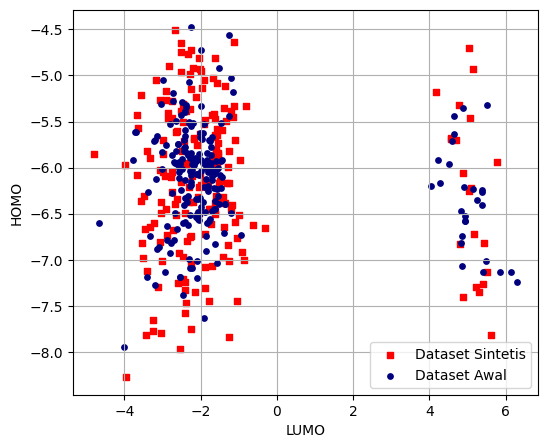

In [ ]:
import matplotlib.pyplot as plt

data_virtual = generate_virtual_samples(data, n_samples=200)

# Concate data
data_virtual = pd.DataFrame(np.column_stack([data_virtual]), columns=list(data.columns))
data_new_kde = np.concatenate((data, data_virtual))
data_new_kde = pd.DataFrame(np.column_stack([data_new_kde]), columns=list(data.columns))

x1 = data['LUMO']
y1 = data['HOMO']
x2 = data_virtual['LUMO']
y2 = data_virtual['HOMO']

# Creating the plot
plt.figure(figsize=(6, 5))
plt.scatter(x2, y2, color='#ff0000', label='Dataset Sintetis',marker='s', s=15)
plt.scatter(x1, y1, color='#00007f', label='Dataset Awal', s=15)
# plt.title('Number of iterations : 50')
plt.xlabel('LUMO')
plt.ylabel('HOMO')
plt.legend()
plt.grid(True)
plt.show()

Range HOMO: 3.5933779364189276
Range LUMO: 11.115094127496041
Range Gap Energy: 11.66025345370688
Range Dipole Moment: 13.361
Range Ionization Potential: 13.644457611673067
Range Electron Affinity: 11.06825483022093
Range Electronegativity: 6.096471560503165
Range Global Hardness: 5.862750357206112
Range Global Softness: 3.6186498298125027
Range Electrophilicity: 21.12804716020524
Range Fraction of electron transferred: 2.181442998323655
Range IE (%): 85.81243224063101


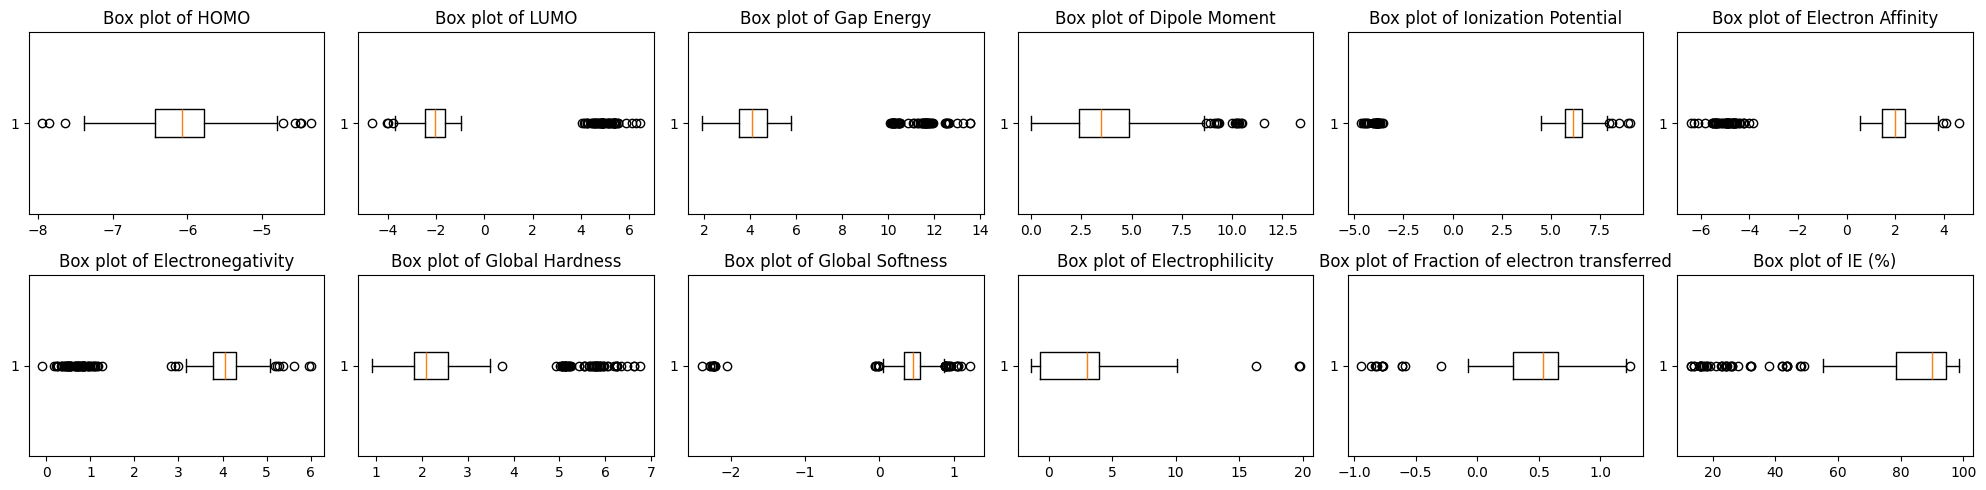

In [ ]:
# Mendapatkan kolom numerik
numeric_columns = data_new_kde.select_dtypes(include=[np.number]).columns

# Menentukan ukuran subplot
n_cols = 6
n_rows = 2

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5))
axes = axes.flatten()

# Iterasi untuk setiap kolom numerik dan plot boxplot pada subplot
for i, column in enumerate(numeric_columns):
    # Menghitung range pada kolom numerik
    column_range = data_new_kde[column].max() - data_new_kde[column].min()
    print(f'Range {column}:', column_range)

    # Membuat box plot pada kolom numerik
    axes[i].boxplot(data_new_kde[column], vert=False)
    axes[i].set_title(f'Box plot of {column}')

# Menyembunyikan axis yang kosong jika jumlah kolom numerik kurang dari jumlah subplot
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Mengatur layout agar tidak overlap
plt.tight_layout()
plt.show()

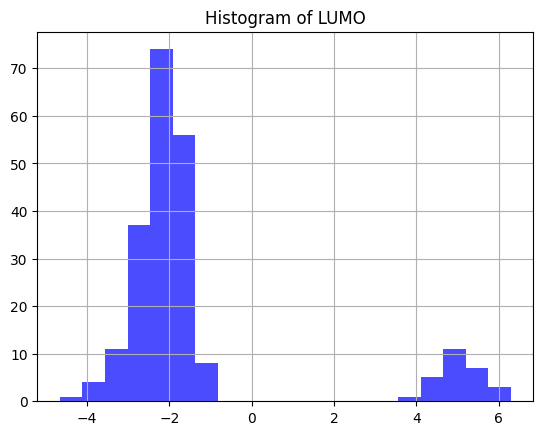

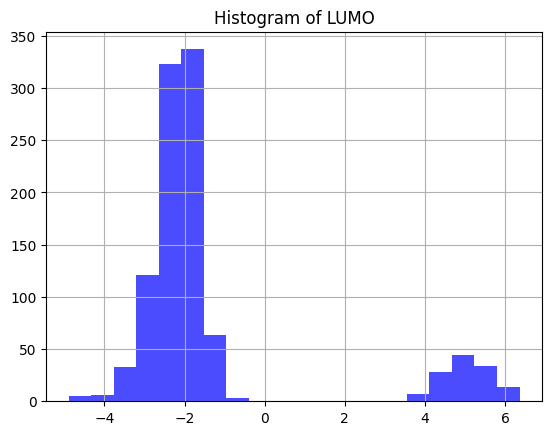

In [ ]:

plt.hist(data['LUMO'], bins=20, color='blue', alpha=0.7)  # Customize the number of bins and color
plt.title('Histogram of LUMO')
# plt.xlabel('Values')
# plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.hist(data_new_kde['LUMO'], bins=20, color='blue', alpha=0.7)  # Customize the number of bins and color
plt.title('Histogram of LUMO')
# plt.xlabel('Values')
# plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## ALL

###linier

Evaluating model: LinearRegression
LinearRegression Fold-1:
MSE: 253.73111477940134
R^2: 0.4348857765167057
------------------


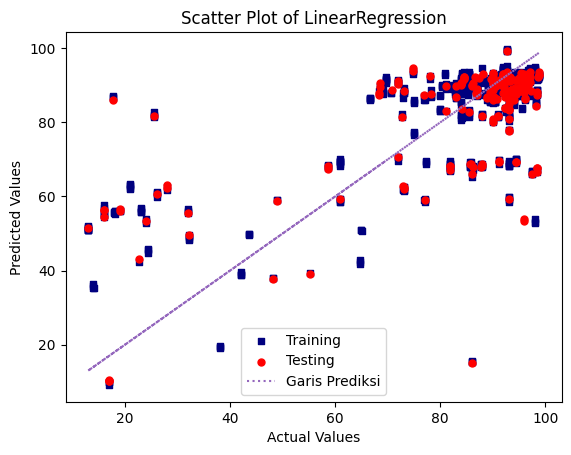

LinearRegression Fold-2:
MSE: 215.6446570335404
R^2: 0.5811155441794449
------------------


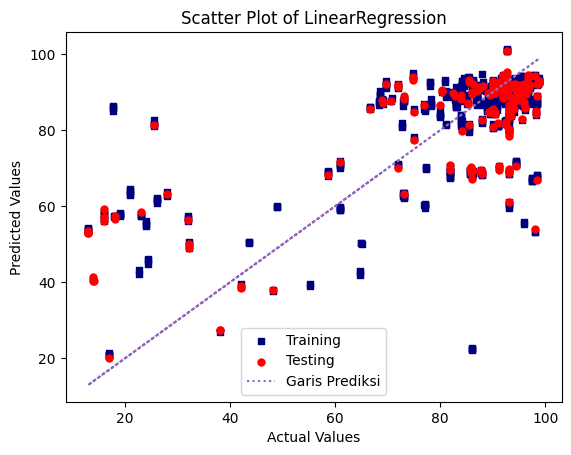

LinearRegression Fold-3:
MSE: 211.5363462647581
R^2: 0.4261412737358373
------------------


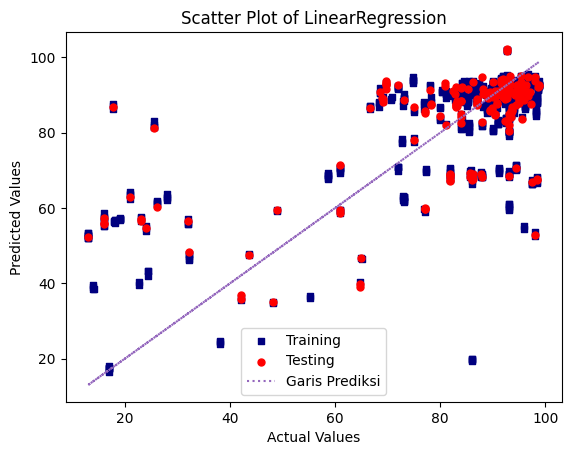

LinearRegression Fold-4:
MSE: 293.7531793741021
R^2: 0.4005330232145424
------------------


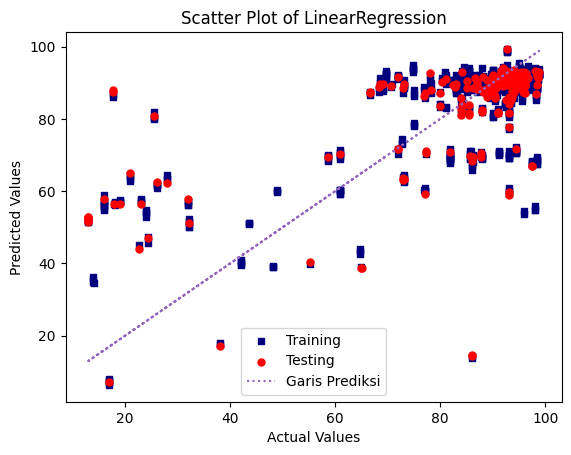

LinearRegression Fold-5:
MSE: 232.85295112907303
R^2: 0.5010498986046067
------------------


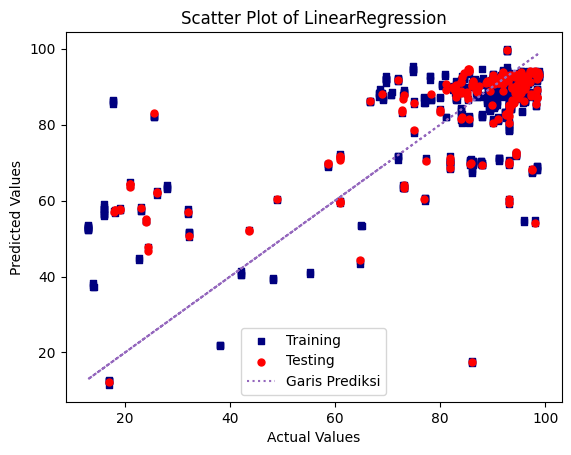

Summary for LinearRegression:
Training
R^2 : 0.4807114500754276
RMSE: 15.387791082293017
Hasil Testing
R^2 : 0.5010498986046067
RMSE: 15.259520016339735


Evaluating model: RidgeRegression
RidgeRegression Fold-1:
MSE: 255.45113629372236
R^2: 0.43105491555475717
------------------


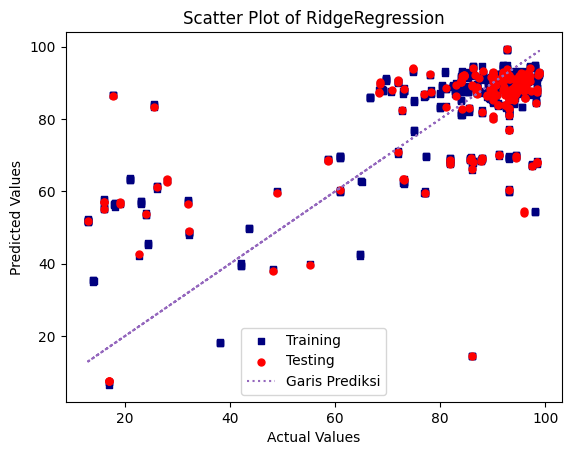

RidgeRegression Fold-2:
MSE: 216.3881004685472
R^2: 0.5796714235460374
------------------


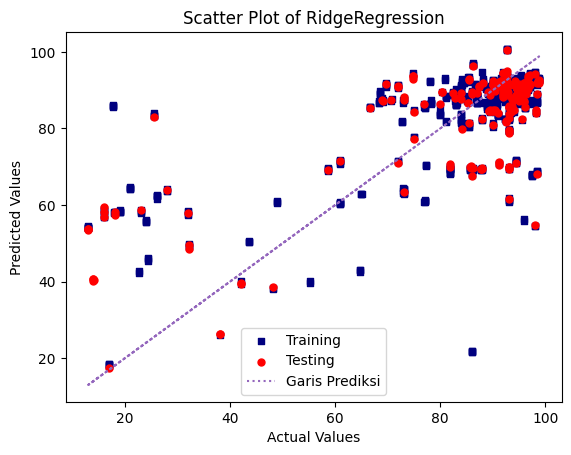

RidgeRegression Fold-3:
MSE: 211.98880558286137
R^2: 0.42491383583895637
------------------


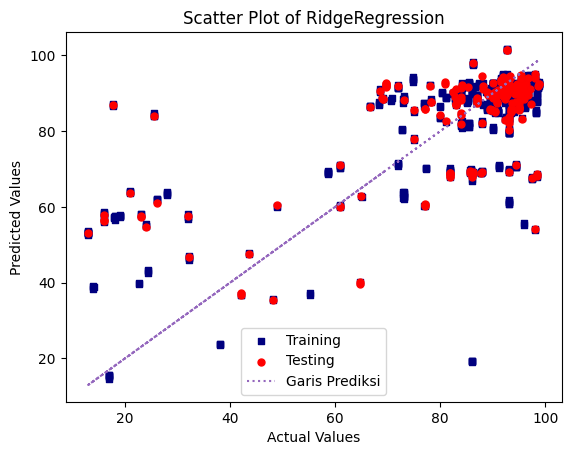

RidgeRegression Fold-4:
MSE: 289.87500593349785
R^2: 0.40844727596524366
------------------


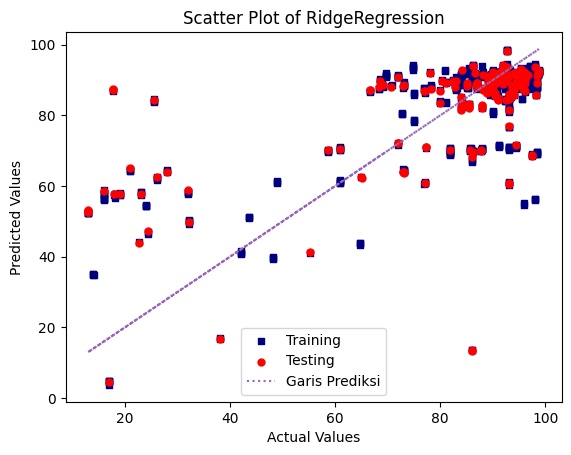

RidgeRegression Fold-5:
MSE: 235.36621327734602
R^2: 0.4956645582100204
------------------


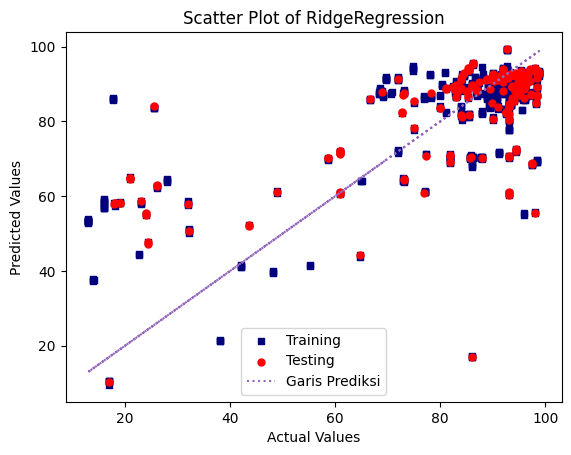

Summary for RidgeRegression:
Training
R^2 : 0.4787076234637314
RMSE: 15.417451640546682
Hasil Testing
R^2 : 0.4956645582100204
RMSE: 15.341649626990769


Evaluating model: LassoRegression
LassoRegression Fold-1:
MSE: 264.56309681204704
R^2: 0.4107606032186434
------------------


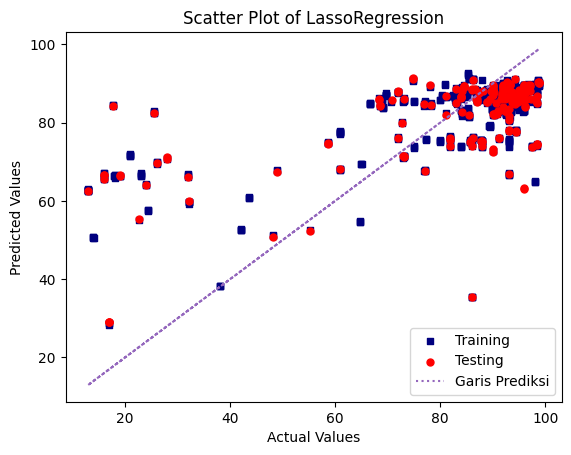

LassoRegression Fold-2:
MSE: 276.4151415463333
R^2: 0.4630703689116271
------------------


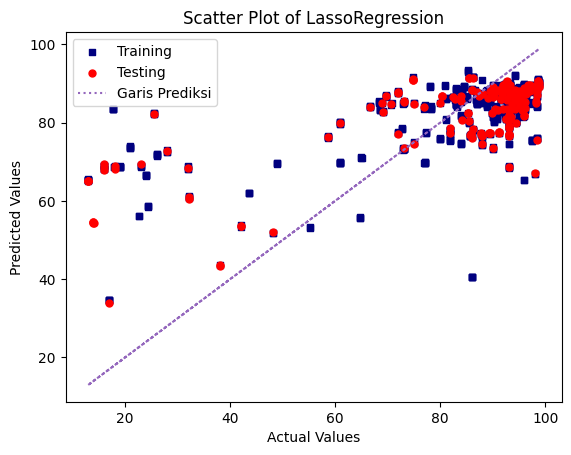

LassoRegression Fold-3:
MSE: 228.1665483028578
R^2: 0.3810266316064177
------------------


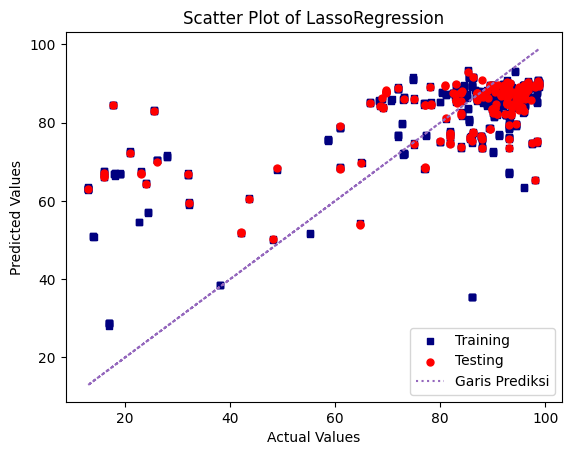

LassoRegression Fold-4:
MSE: 312.5429220185021
R^2: 0.3621884843005636
------------------


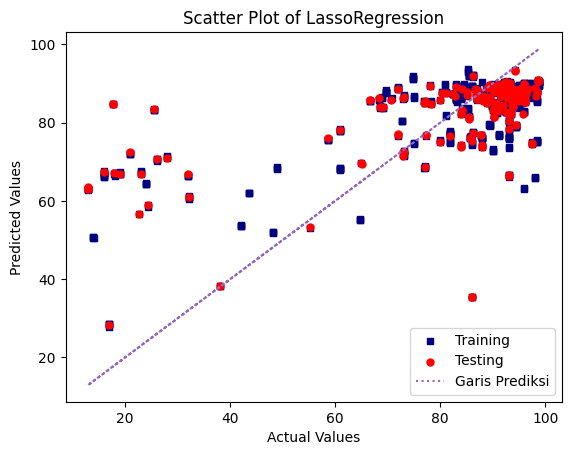

LassoRegression Fold-5:
MSE: 286.71627292616483
R^2: 0.3856332386832365
------------------


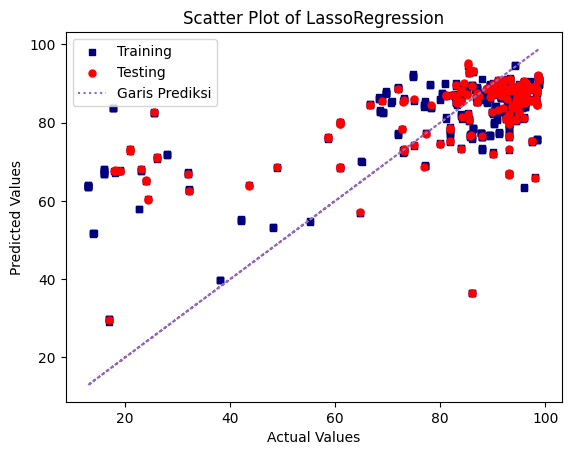

Summary for LassoRegression:
Training
R^2 : 0.4059197988160097
RMSE: 16.458659003258628
Hasil Testing
R^2 : 0.3856332386832365
RMSE: 16.932698335651196


Evaluating model: ElasticNet
ElasticNet Fold-1:
MSE: 363.50025756577344
R^2: 0.19040608807928472
------------------


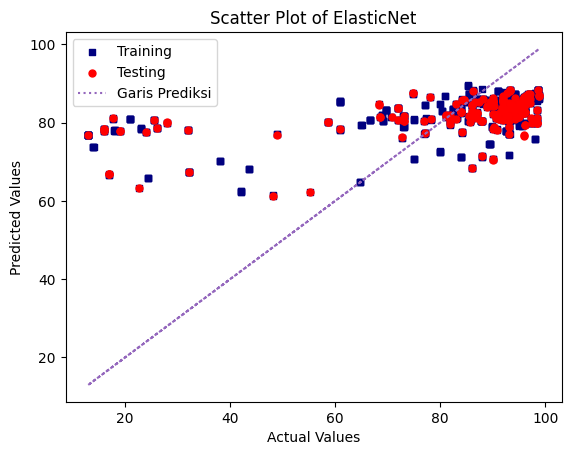

ElasticNet Fold-2:
MSE: 417.0220813017302
R^2: 0.18994483798380868
------------------


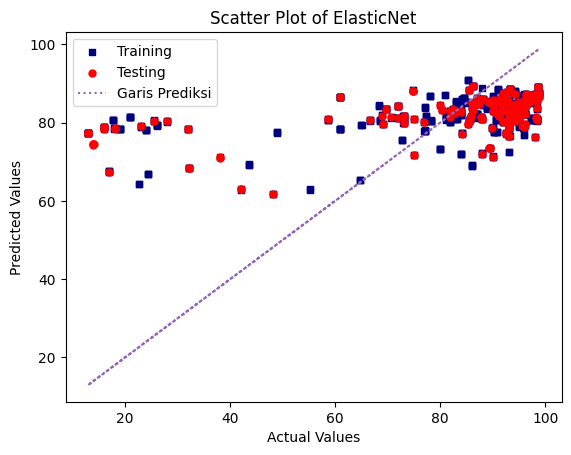

ElasticNet Fold-3:
MSE: 301.21256143424057
R^2: 0.18286639676060035
------------------


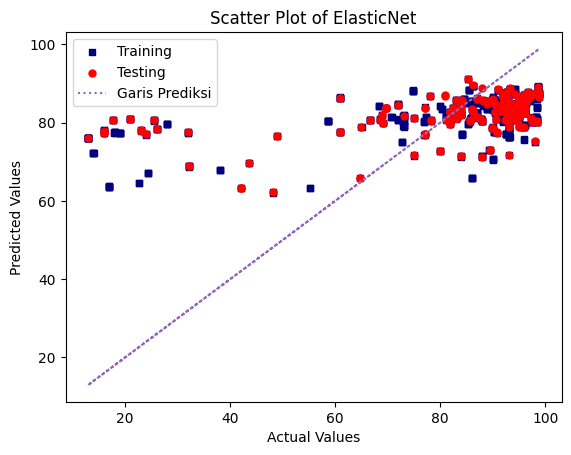

ElasticNet Fold-4:
MSE: 404.9403493426321
R^2: 0.17363152454691044
------------------


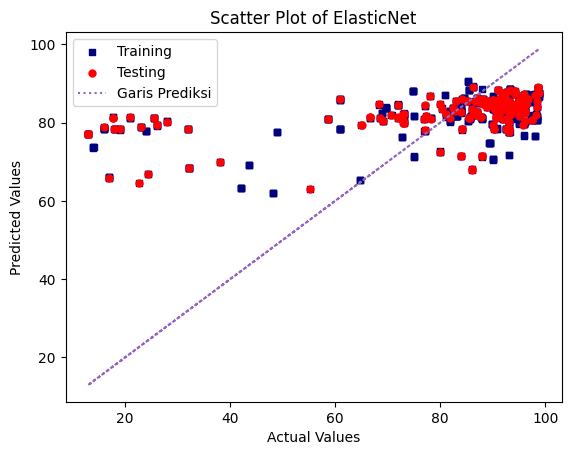

ElasticNet Fold-5:
MSE: 389.94082300790376
R^2: 0.16444686556646082
------------------


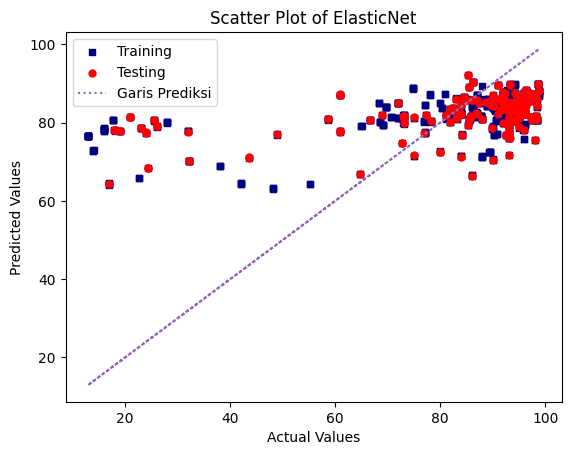

Summary for ElasticNet:
Training
R^2 : 0.19067862724476525
RMSE: 19.21022328152676
Hasil Testing
R^2 : 0.16444686556646082
RMSE: 19.746919329553755




In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

# Definisikan model-model yang akan dijalankan
models = {
    'LinearRegression': LinearRegression(),
    'RidgeRegression': Ridge(),
    'LassoRegression': Lasso(),
    'ElasticNet': ElasticNet(),
}


# Buat virtual samples
data_virtual = generate_virtual_samples(data, n_samples=800)

# Concate data
data_virtual = pd.DataFrame(np.column_stack([data_virtual]), columns=list(data.columns))
data_new_kde = np.concatenate((data, data_virtual))
data_new_kde = pd.DataFrame(np.column_stack([data_new_kde]), columns=list(data.columns))


# List untuk menyimpan skor MSE dan R2 pada setiap iterasi
x_combined, y_combined = load_feature(data_new_kde)

# Normalisasi data menggunakan RobustScaler
x_combined = RobustScaler().fit_transform(x_combined)

# KFold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop untuk setiap model
for model_name, model in models.items():
    mse_scores = []
    r2_scores = []

    print(f"Evaluating model: {model_name}")

    for train, test in kfold.split(x_combined, y_combined):
        x_train, x_test = x_combined[train], x_combined[test]
        y_train, y_test = y_combined[train], y_combined[test]

        # Training model
        model.fit(x_train, y_train)
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        # Hitung skor MSE
        mse = mean_squared_error(y_test, y_pred_test)
        mse_scores.append(mse)

        # Hitung skor R^2 (koefisien determinasi)
        r2 = r2_score(y_test, y_pred_test)
        r2_scores.append(r2)

        # Cetak skor MSE dan R^2
        print(f"{model_name} Fold-{len(mse_scores)}:")
        print(f"MSE: {mse}")
        print(f"R^2: {r2}")
        print("------------------")

        #Buat visualisasi hasil prediksi
        plt.scatter(y_train, y_pred_train, color='#00007f', marker='s', label='Training', s=25)
        plt.scatter(y_test, y_pred_test, color='#ff0000', marker='o', label='Testing', s=25)
        plt.plot(y_combined, y_combined, color='#9467bd', linestyle='dotted', label='Garis Prediksi')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Scatter Plot of {model_name}')
        plt.legend()
        plt.show()

    # Summary hasil training dan testing untuk model ini
    print(f'Summary for {model_name}:')
    print('Training')
    print('R^2 :', r2_score(y_train, y_pred_train))
    print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print('================================')
    print('Hasil Testing')
    print('R^2 :', r2_score(y_test, y_pred_test))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print('================================\n\n')

    add_scoreR2(model_name, r2_score(y_test, y_pred_test))

###non-linier

Evaluating model: KNeighborsRegressor
KNeighborsRegressor Fold-1:
MSE: 36.61106056800373
R^2: 0.9247223433356254
------------------


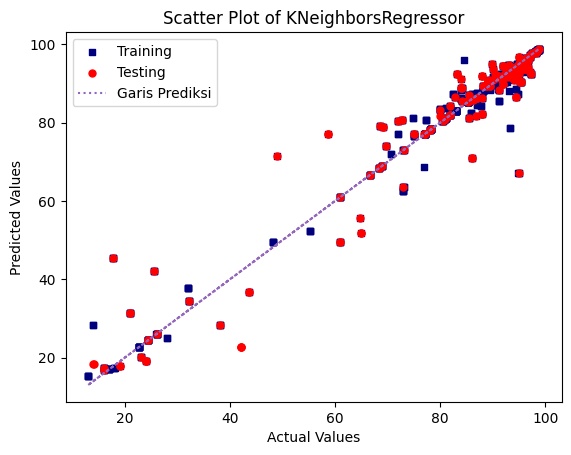

KNeighborsRegressor Fold-2:
MSE: 26.574059969652005
R^2: 0.9351365043999692
------------------


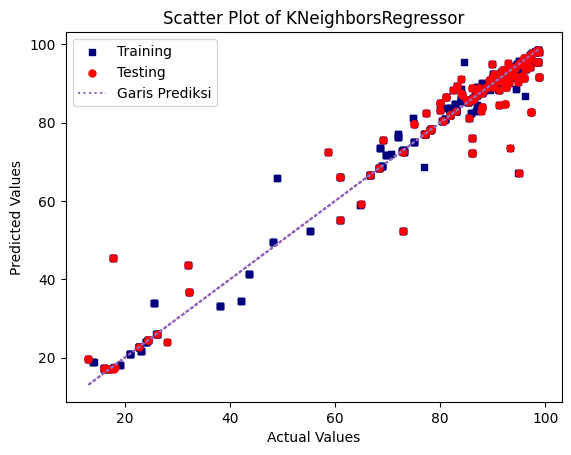

KNeighborsRegressor Fold-3:
MSE: 28.776294988506468
R^2: 0.93111778524749
------------------


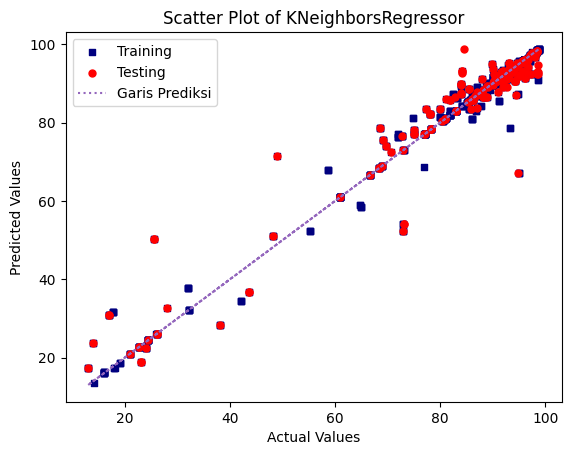

KNeighborsRegressor Fold-4:
MSE: 40.38532331838992
R^2: 0.9148046769958477
------------------


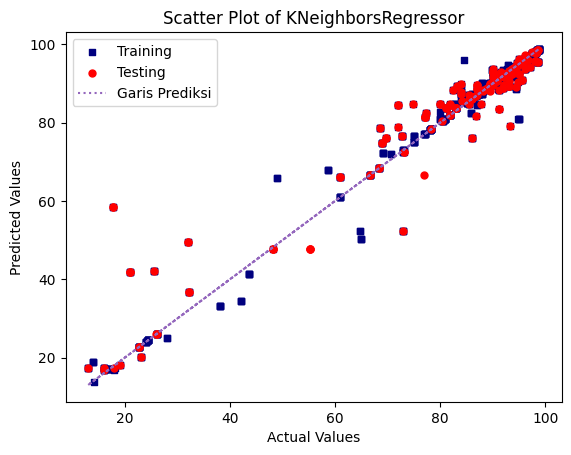

KNeighborsRegressor Fold-5:
MSE: 31.99394142372697
R^2: 0.9282557398517346
------------------


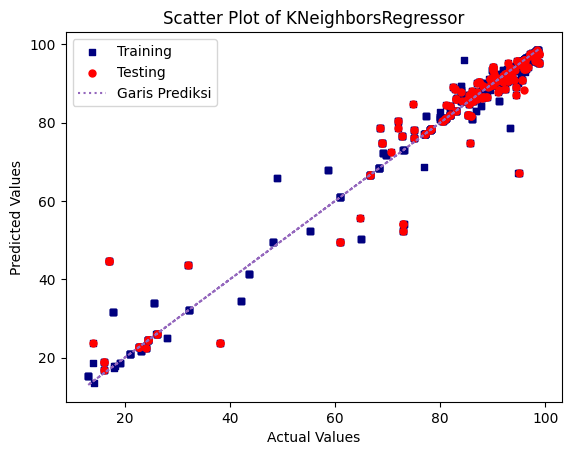

Summary for KNeighborsRegressor:
Training
R^2 : 0.9595370889367391
RMSE: 4.260637012349476
Hasil Testing
R^2 : 0.9282557398517346
RMSE: 5.656318716597127


Evaluating model: RandomForestRegressor
RandomForestRegressor Fold-1:
MSE: 10.923048007655296
R^2: 0.9775406272068673
------------------


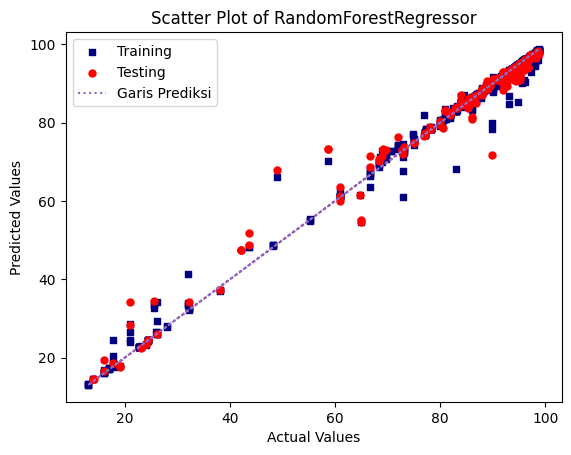

RandomForestRegressor Fold-2:
MSE: 8.33879729577689
R^2: 0.9796461834464937
------------------


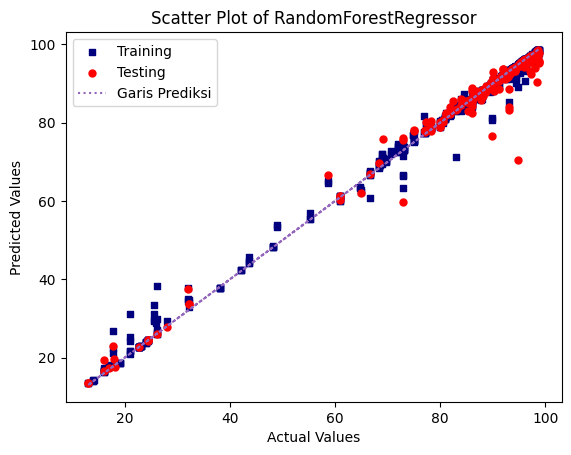

RandomForestRegressor Fold-3:
MSE: 14.116854186085474
R^2: 0.966208291162424
------------------


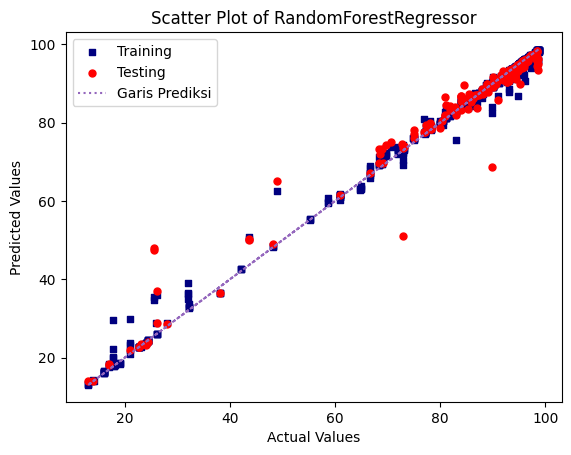

RandomForestRegressor Fold-4:
MSE: 17.45272091378609
R^2: 0.9631824119908864
------------------


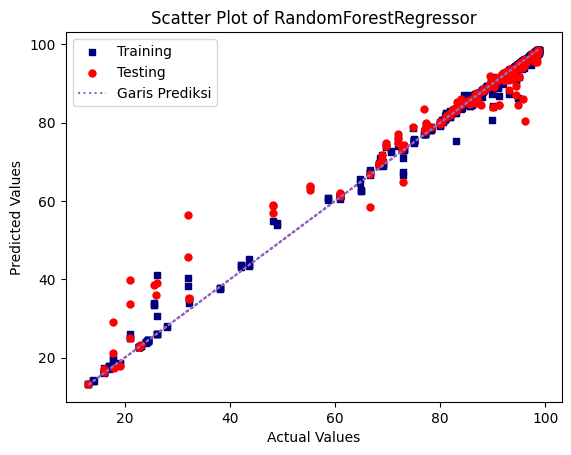

RandomForestRegressor Fold-5:
MSE: 6.069209906715588
R^2: 0.9863902052993411
------------------


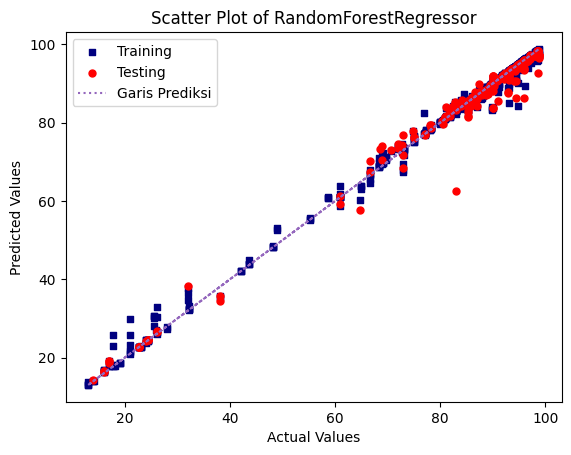

Summary for RandomForestRegressor:
Training
R^2 : 0.9961000137001516
RMSE: 1.3227492204928333
Hasil Testing
R^2 : 0.9863902052993411
RMSE: 2.463576649247104


Evaluating model: GradientBoostingRegressor
GradientBoostingRegressor Fold-1:
MSE: 23.11926417005894
R^2: 0.9524634358162335
------------------


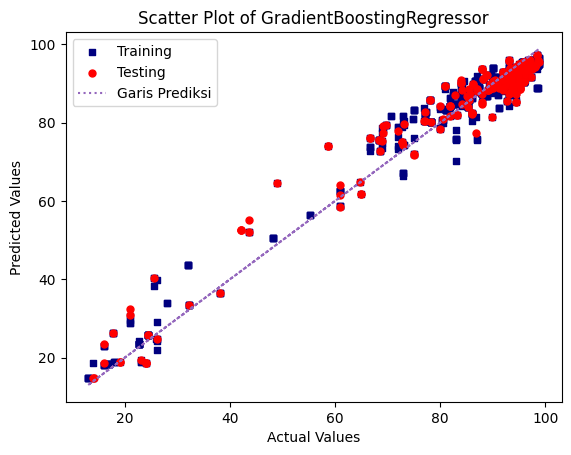

GradientBoostingRegressor Fold-2:
MSE: 27.157868458607048
R^2: 0.9337115110268135
------------------


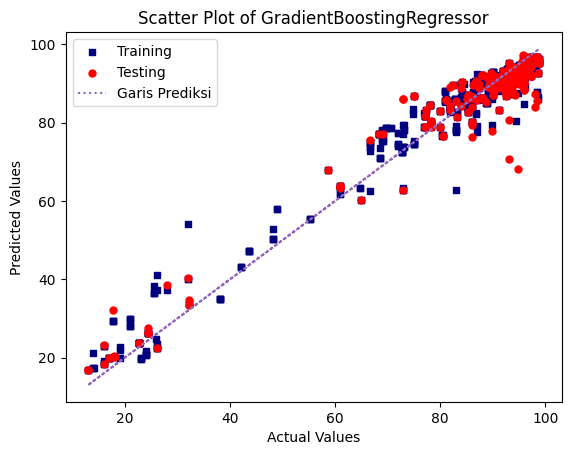

GradientBoostingRegressor Fold-3:
MSE: 42.39496526904826
R^2: 0.8985185861051896
------------------


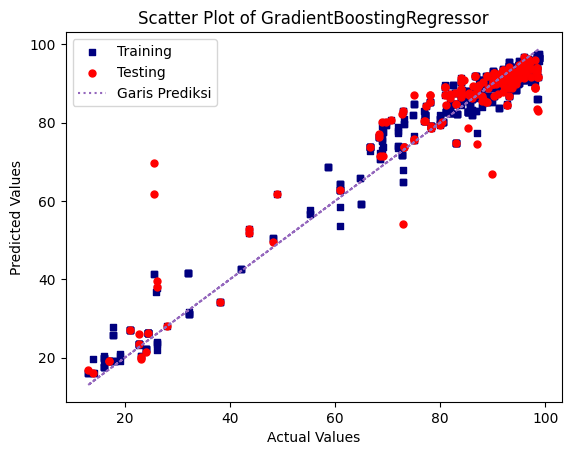

GradientBoostingRegressor Fold-4:
MSE: 37.71610078646099
R^2: 0.9204355660687128
------------------


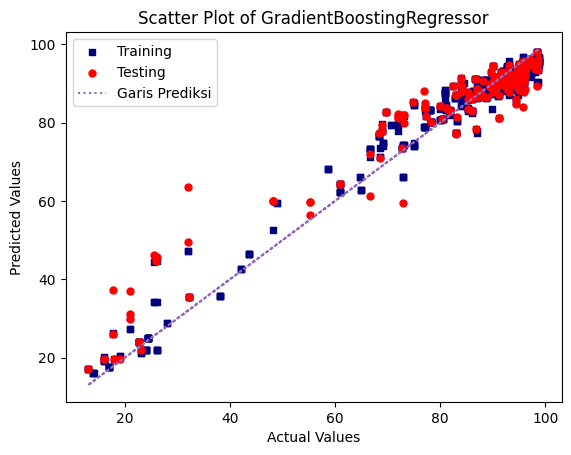

GradientBoostingRegressor Fold-5:
MSE: 26.40446742057494
R^2: 0.9407897590794098
------------------


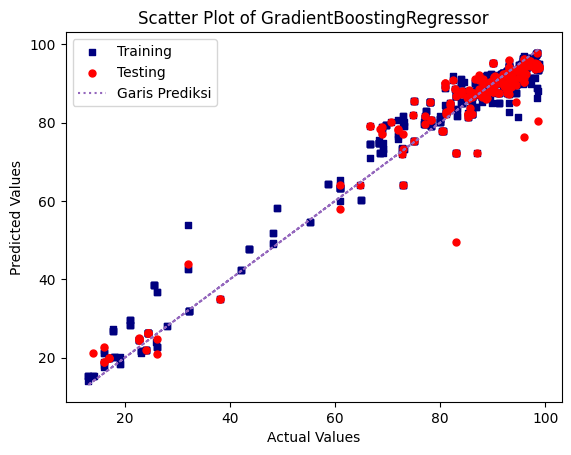

Summary for GradientBoostingRegressor:
Training
R^2 : 0.9656148251402716
RMSE: 3.927639256950454
Hasil Testing
R^2 : 0.9407897590794098
RMSE: 5.138527748351169


Evaluating model: AdaBoostRegressor
AdaBoostRegressor Fold-1:
MSE: 67.93282090398543
R^2: 0.8603202559851026
------------------


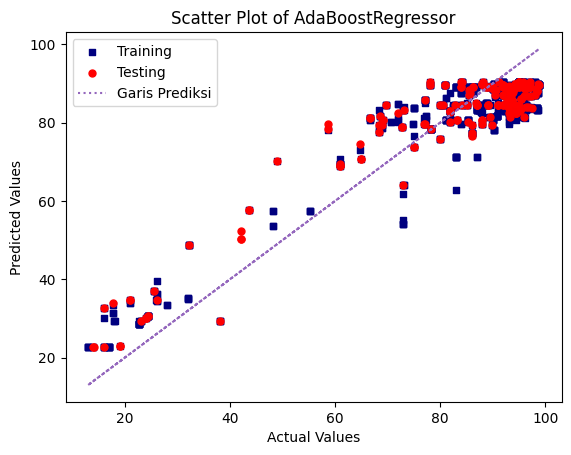

AdaBoostRegressor Fold-2:
MSE: 82.87331650805136
R^2: 0.7977180375592288
------------------


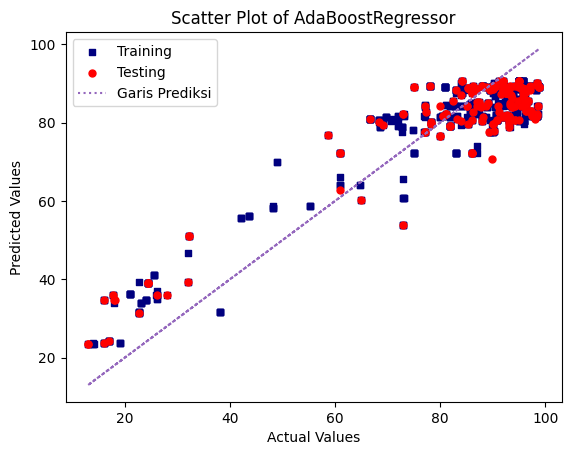

AdaBoostRegressor Fold-3:
MSE: 81.90081103945198
R^2: 0.8039528974568289
------------------


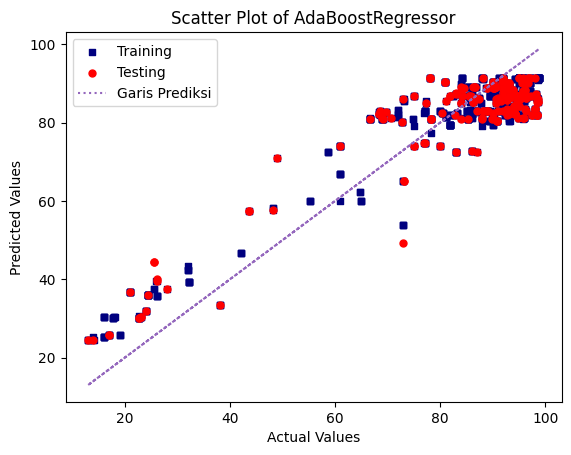

AdaBoostRegressor Fold-4:
MSE: 85.71150045010563
R^2: 0.8191863190385269
------------------


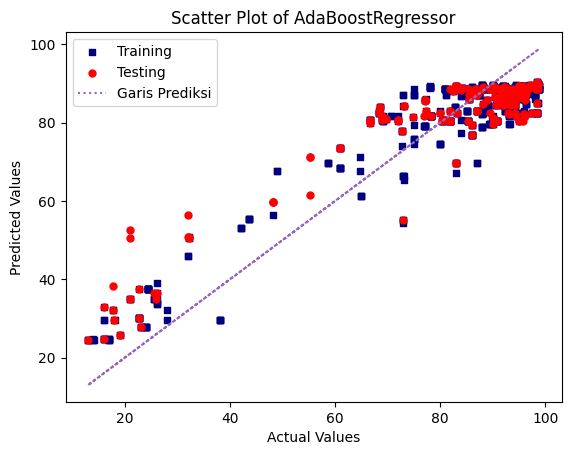

AdaBoostRegressor Fold-5:
MSE: 69.38765754975522
R^2: 0.8444028483893972
------------------


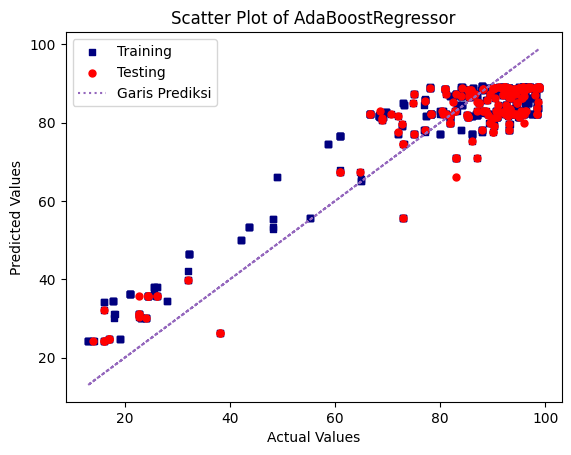

Summary for AdaBoostRegressor:
Training
R^2 : 0.8308247827015464
RMSE: 8.711929354824523
Hasil Testing
R^2 : 0.8444028483893972
RMSE: 8.329925422820736


Evaluating model: XGBRegressor
XGBRegressor Fold-1:
MSE: 23.391811412484767
R^2: 0.9519030391103789
------------------


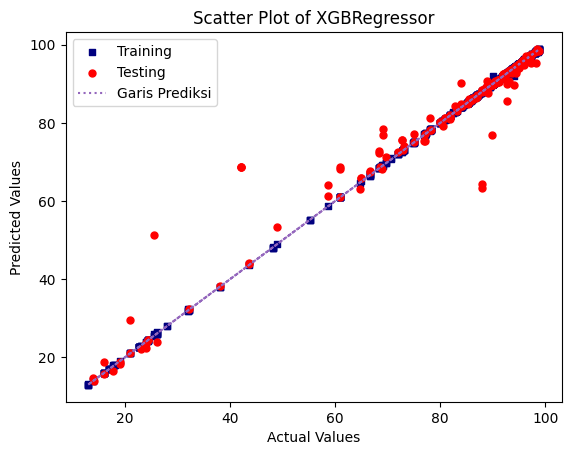

XGBRegressor Fold-2:
MSE: 17.182342056958824
R^2: 0.9580603502181241
------------------


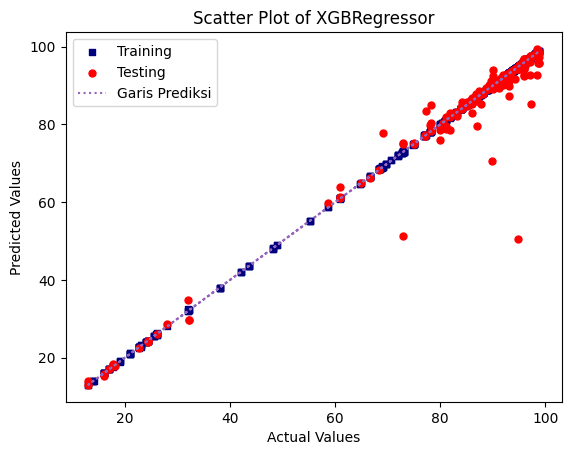

XGBRegressor Fold-3:
MSE: 12.562443882959888
R^2: 0.9699291045734686
------------------


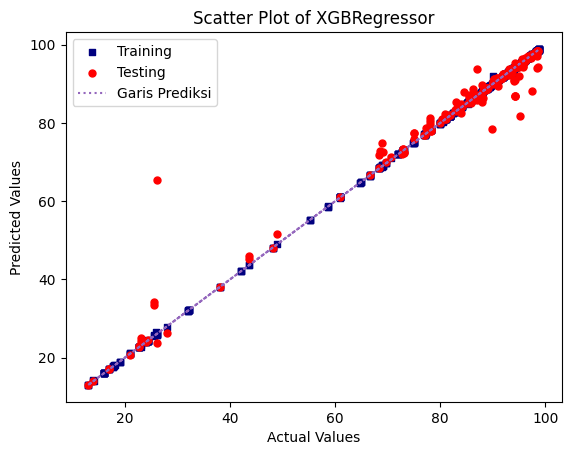

XGBRegressor Fold-4:
MSE: 15.426123895159188
R^2: 0.9674576430256854
------------------


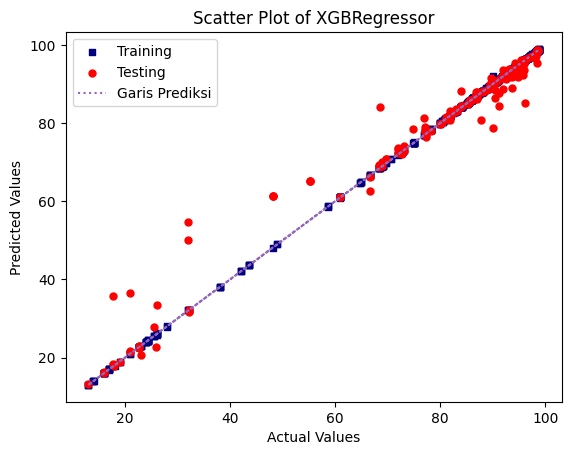

XGBRegressor Fold-5:
MSE: 9.291288616575134
R^2: 0.9791649106688108
------------------


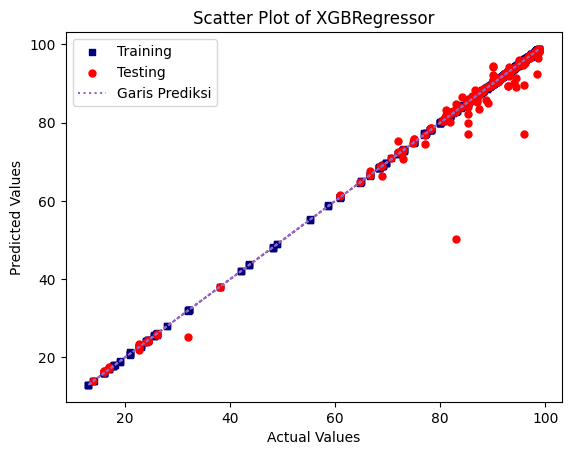

Summary for XGBRegressor:
Training
R^2 : 0.9999829739464579
RMSE: 0.08739829713947289
Hasil Testing
R^2 : 0.9791649106688108
RMSE: 3.0481615141877136




In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

# Definisikan model-model yang akan dijalankan
models = {
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'XGBRegressor': XGBRegressor(),
    # 'BaggingRegressor': BaggingRegressor()
}


# Buat virtual samples
data_virtual = generate_virtual_samples(data, n_samples=800)

# Concate data
data_virtual = pd.DataFrame(np.column_stack([data_virtual]), columns=list(data.columns))
data_new_kde = np.concatenate((data, data_virtual))
data_new_kde = pd.DataFrame(np.column_stack([data_new_kde]), columns=list(data.columns))


# List untuk menyimpan skor MSE dan R2 pada setiap iterasi
x_combined, y_combined = load_feature(data_new_kde)

# Normalisasi data menggunakan RobustScaler
x_combined = RobustScaler().fit_transform(x_combined)

# KFold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# # Prepare the storage for R^2 scores
# scores = {name: [] for name in models.keys()}

# Loop untuk setiap model
for model_name, model in models.items():
    mse_scores = []
    r2_scores = []

    print(f"Evaluating model: {model_name}")

    for train, test in kfold.split(x_combined, y_combined):
        x_train, x_test = x_combined[train], x_combined[test]
        y_train, y_test = y_combined[train], y_combined[test]

        # Training model
        model.fit(x_train, y_train)
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        # Hitung skor MSE
        mse = mean_squared_error(y_test, y_pred_test)
        mse_scores.append(mse)

        # Hitung skor R^2 (koefisien determinasi)
        r2 = r2_score(y_test, y_pred_test)
        r2_scores.append(r2)
        # scores[model_name].append(r2)
        add_score(model_name, r2)

        # Cetak skor MSE dan R^2
        print(f"{model_name} Fold-{len(mse_scores)}:")
        print(f"MSE: {mse}")
        print(f"R^2: {r2}")
        print("------------------")

        #Buat visualisasi hasil prediksi
        plt.scatter(y_train, y_pred_train, color='#00007f', marker='s', label='Training', s=25)
        plt.scatter(y_test, y_pred_test, color='#ff0000', marker='o', label='Testing', s=25)
        plt.plot(y_combined, y_combined, color='#9467bd', linestyle='dotted', label='Garis Prediksi')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Scatter Plot of {model_name}')
        plt.legend()
        plt.show()

    # Summary hasil training dan testing untuk model ini
    print(f'Summary for {model_name}:')
    print('Training')
    print('R^2 :', r2_score(y_train, y_pred_train))
    print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print('================================')
    print('Hasil Testing')
    print('R^2 :', r2_score(y_test, y_pred_test))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print('================================\n\n')

    add_scoreR2(model_name, r2_score(y_test, y_pred_test))

# # Plotting the results
# plt.figure(figsize=(10, 6))
# for model_name, model_scores in scores.items():
#     if len(model_scores) == 5:  # Check if scores are collected correctly
#         plt.plot(range(1, 6), model_scores, marker='o', label=f'{model_name} R^2')
#     else:
#         print(f'Error: Expected 5 scores, got {len(model_scores)} for {model_name}')

# plt.title('R^2 Score Comparison between Linear Regression and AdaBoostRegressor')
# plt.xlabel('Fold')
# plt.ylabel('R^2 Score')
# plt.legend()
# plt.grid(True)
# plt.ylim(0, 1)  # Adjust based on the range of your scores
# plt.show()

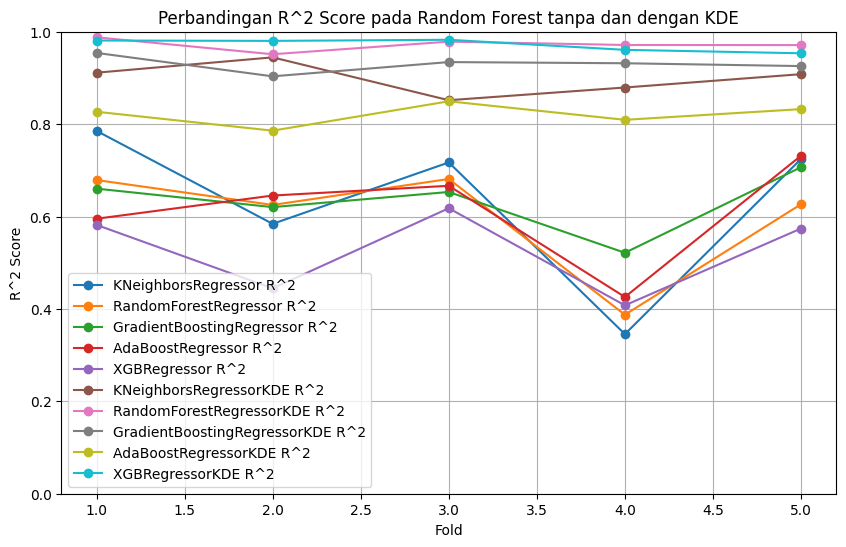

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
for model_name, model_scores in scores.items():
    if len(model_scores) == 5:  # Check if scores are collected correctly
        plt.plot(range(1, 6), model_scores, marker='o', label=f'{model_name} R^2')
    else:
        print(f'Error: Expected 5 scores, got {len(model_scores)} for {model_name}')

plt.title('Perbandingan R^2 Score pada Random Forest tanpa dan dengan KDE')
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Adjust based on the range of your scores
plt.show()

In [ ]:
scoresR2

{'LinearRegression': [0.6211173581667624, 0.26116018150448916],
 'RidgeRegression': [0.6093752613410841, 0.2651480486741986],
 'LassoRegression': [0.4301484558464088, 0.3095970614118655],
 'ElasticNet': [0.17979530083529283, 0.19922682502747635],
 'KNeighborsRegressor': [0.72464647670396, 0.9028012466995893],
 'RandomForestRegressor': [0.6126533560513614, 0.9884505634864034],
 'GradientBoostingRegressor': [0.7094481366687888, 0.9482726890232651],
 'AdaBoostRegressor': [0.6804936540915707, 0.8296272748949249],
 'XGBRegressor': [0.5740350394650575, 0.981343325291339]}

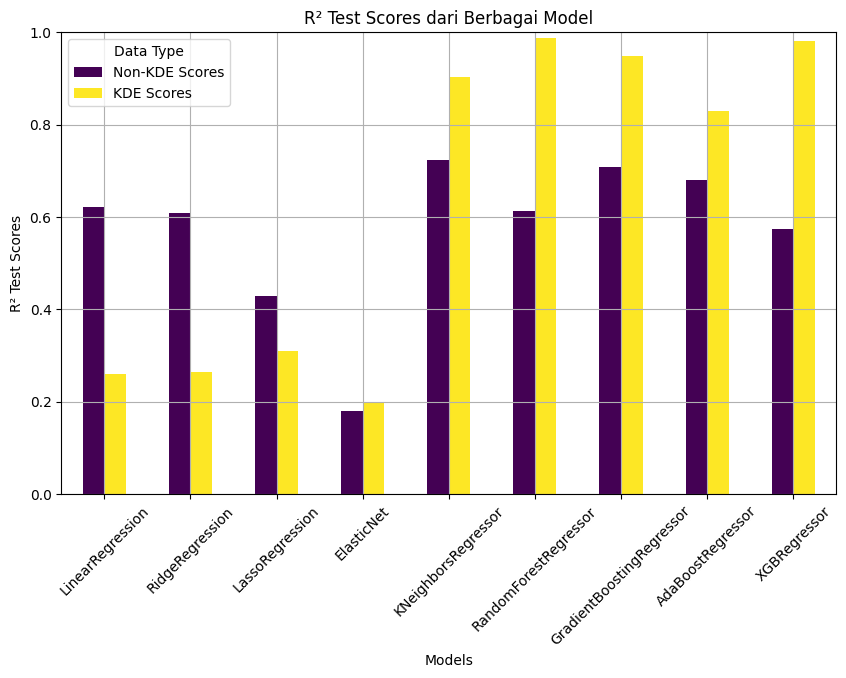

In [ ]:
# Mengonversi data ke DataFrame
df = pd.DataFrame(scoresR2, index=['Non-KDE Scores', 'KDE Scores']).T

# Plotting
ax = df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('R² Test Scores dari Berbagai Model')
plt.xlabel('Models')
plt.ylabel('R² Test Scores')
plt.ylim(0, 1.0)  # Sesuaikan batas untuk skala kamu
plt.xticks(rotation=45)  # Memutar label sumbu x menjadi 45 derajat
plt.legend(title='Data Type')
plt.grid(True)
plt.show()

# visual

In [ ]:
import matplotlib.pyplot as plt

# Contoh data, ganti dengan data aktual Anda
# data = pd.DataFrame({
#     'Actual': [...],  # nilai aktual
#     'Predicted': [...]  # nilai prediksi sebelum KDE
# })
# data_new_kde = pd.DataFrame({
#     'Actual': [...],  # nilai aktual
#     'Predicted': [...]  # nilai prediksi setelah KDE
# })

# Menghitung residual
data['Residual'] = data['Actual'] - data['Predicted']
data_new_kde['Residual'] = data_new_kde['Actual'] - data_new_kde['Predicted']

# Subplot untuk Plot Korelasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data['Actual'], data['Predicted'], alpha=0.5)
plt.title('Korelasi Sebelum KDE')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(data_new_kde['Actual'], data_new_kde['Predicted'], alpha=0.5, color='red')
plt.title('Korelasi Setelah KDE')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.grid(True)

plt.tight_layout()
plt.show()

# Subplot untuk Distribusi Residual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['Residual'], bins=20, color='blue', alpha=0.7)
plt.title('Distribusi Residual Sebelum KDE')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(data_new_kde['Residual'], bins=20, color='red', alpha=0.7)
plt.title('Distribusi Residual Setelah KDE')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')
plt.grid(True)

plt.tight_layout()
plt.show()


KeyError: 'Actual'

## RF

In [ ]:
from imblearn.over_sampling import SMOTE
# With KDE (version 1)

# With KDE (version 1)
data = pd.read_excel('/content/N-Heterocyclic.xlsx')

kde = KernelDensity(kernel='tophat', bandwidth=0.02)
kde.fit(data)
data_kde = kde.sample(800)

# smote = SMOTE(k_neighbors=2)
# X_resampled, y_resampled = smote.fit_resample(X, y)

data_kde = pd.DataFrame(np.column_stack([data_kde]), columns=list(data.columns))
data_new_kde = np.concatenate((data, data_kde))
data_new_kde = pd.DataFrame(np.column_stack([data_new_kde]), columns=list(data.columns))

x_kde = data_new_kde.drop('IE (%)', axis=1)
y_kde = data_new_kde['IE (%)'].values

x_kde = RobustScaler().fit_transform(x_kde)

mse_scores = []
r2_scores = []
rf = RandomForestRegressor()

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
for train_kde, test_kde in kfold.split(x_kde, y_kde):
    x_train_kde, x_test_kde = x_kde[train_kde], x_kde[test_kde]
    y_train_kde, y_test_kde = y_kde[train_kde], y_kde[test_kde]
    rf.fit(x_train_kde, y_train_kde)
    y_pred_train_kde1_rf = rf.predict(x_train_kde)
    y_pred_test_kde1_rf = rf.predict(x_test_kde)


print('Training')
print('R^2 :', r2_score(y_train_kde, y_pred_train_kde1_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_train_kde, y_pred_train_kde1_rf)))
print('================================')
print('Testing')
print('R^2 :', r2_score(y_test_kde, y_pred_test_kde1_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test_kde, y_pred_test_kde1_rf)))

Training
R^2 : 0.9925236994018605
RMSE: 1.8136361581041631
Testing
R^2 : 0.9750526892798675
RMSE: 3.595172065915294


## NN 1

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 6518.7388 - mean_absolute_error: 77.2527 - mean_absolute_percentage_error: 94.5031 - mean_squared_error: 6518.7388 - val_loss: 3636.6062 - val_mean_absolute_error: 56.5533 - val_mean_absolute_percentage_error: 69.2877 - val_mean_squared_error: 3636.6062
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2454.2520 - mean_absolute_error: 43.8099 - mean_absolute_percentage_error: 55.5355 - mean_squared_error: 2454.2520 - val_loss: 1104.6415 - val_mean_absolute_error: 26.8575 - val_mean_absolute_percentage_error: 39.0990 - val_mean_squared_error: 1104.6415
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 977.3798 - mean_absolute_error: 24.7669 - mean_absolute_percentage_error: 34.6201 - mean_squared_error: 977.3798 - val_loss: 649.0611 - val_mean_absolute_error: 20.1953 - val_mean_absolute_percentage_error: 33.2901 - val_mean_squared_error: 649.0611
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 596.8868 - mean_abso

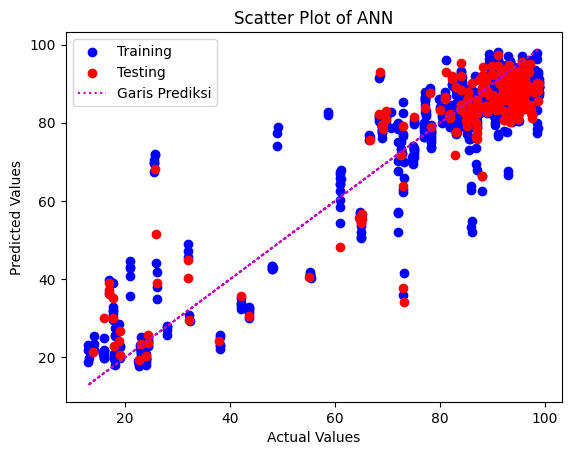

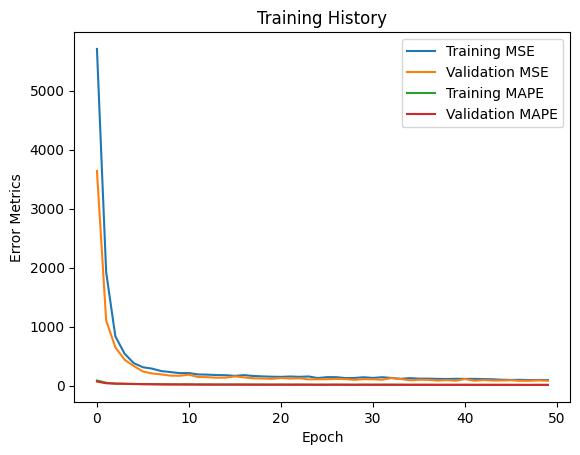

Summary for ANN:
Training
R^2 : 0.8520143130815143
RMSE: 8.582725536116472
Hasil Testing
R^2 : 0.8208727587571016
RMSE: 9.013845550531295




In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Buat virtual samples
data_virtual = generate_virtual_samples(data, n_samples=1000)

# Concate data
data_virtual = pd.DataFrame(np.column_stack([data_virtual]), columns=list(data.columns))
data_new_kde = np.concatenate((data, data_virtual))
data_new_kde = pd.DataFrame(np.column_stack([data_new_kde]), columns=list(data.columns))

# List untuk menyimpan skor MSE dan R2 pada setiap iterasi
x_combined, y_combined = load_feature(data_new_kde)


X_train, X_test, y_train, y_test = train_test_split(x_combined, y_combined, test_size=0.2, random_state=42)

# Normalisasi data menggunakan RobustScaler
scaler = RobustScaler()
# scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential()
model.add(Dense(256, input_dim=11, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    callbacks=[early_stopping]
)

# Evaluate the model
evaluation_nn = model.evaluate(X_test_scaled, y_test)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Buat visualisasi hasil prediksi
plt.scatter(y_train, y_pred_train, color='b', label='Training')
plt.scatter(y_test, y_pred_test, color='r', label='Testing')
plt.plot(y_combined, y_combined, color='m', linestyle='dotted', label='Garis Prediksi')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Scatter Plot of ANN')
plt.legend()
plt.show()

# Plot training & validation MSE and MAPE values
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.plot(history.history['mean_absolute_percentage_error'], label='Training MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation MAPE')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Error Metrics')
plt.legend(['Training MSE', 'Validation MSE', 'Training MAPE', 'Validation MAPE'])
plt.show()


# Summary hasil training dan testing untuk model ini
print(f'Summary for ANN:')
print('Training')
print('R^2 :', r2_score(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
# print('MAPE :', np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100)
print('================================')
print('Hasil Testing')
print('R^2 :', r2_score(y_test, y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
# print('MAPE :', np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100)
print('================================\n\n')




## NN 2


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 6575.8594 - mean_absolute_error: 77.8387 - mean_absolute_percentage_error: 94.6896 - mean_squared_error: 6575.8594 - val_loss: 3597.0813 - val_mean_absolute_error: 56.9278 - val_mean_absolute_percentage_error: 68.0607 - val_mean_squared_error: 3597.0813
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2641.4119 - mean_absolute_error: 45.7696 - mean_absolute_percentage_error: 57.1580 - mean_squared_error: 2641.4119 - val_loss: 1120.8783 - val_mean_absolute_error: 27.1075 - val_mean_absolute_percentage_error: 35.6626 - val_mean_squared_error: 1120.8783
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1078.2495 - mean_absolute_error: 26.7366 - mean_absolute_percentage_error: 38.3647 - mean_squared_error: 1078.2495 - val_loss: 652.9797 - val_mean_absolute_error: 20.3267 - val_mean_absolute_percentage_error: 31.8174 - val_mean_squared_error: 652.9797
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 630.6930 - mean_ab

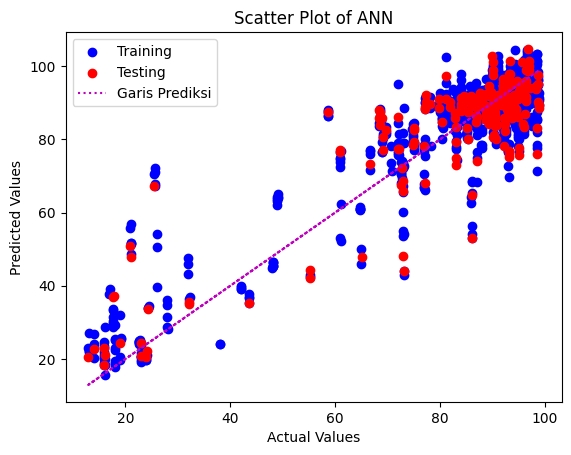

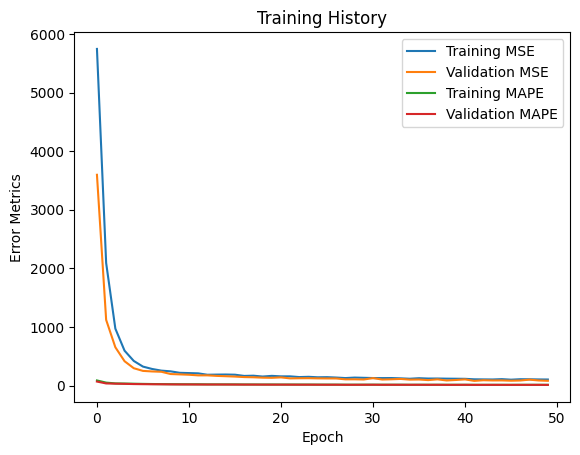

Summary for ANN:
Training
R^2 : 0.8438653639407152
MAPE : 45.52942545291357
Hasil Testing
R^2 : 0.7891010784982062
MAPE : 45.52942545291357




In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Buat virtual samples
data_virtual = generate_virtual_samples(data, n_samples=1000)

# Concate data
data_virtual = pd.DataFrame(np.column_stack([data_virtual]), columns=list(data.columns))
data_new_kde = np.concatenate((data, data_virtual))
data_new_kde = pd.DataFrame(np.column_stack([data_new_kde]), columns=list(data.columns))

# List untuk menyimpan skor MSE dan R2 pada setiap iterasi
x_combined, y_combined = load_feature(data_new_kde)


X_train, X_test, y_train, y_test = train_test_split(x_combined, y_combined, test_size=0.2, random_state=42)

# Normalisasi data agar Neural Network lebih mudah belajar
# Normalisasi data menggunakan RobustScaler
scaler = RobustScaler()
# scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential()

# Layer pertama (input layer) dengan 256 unit
model.add(Dense(256, input_dim=11, activation='relu'))

# Layer kedua dengan 128 unit
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Dropout untuk regularisasi

# Layer ketiga dengan 64 unit
model.add(Dense(64, activation='relu'))

# Layer keempat dengan 32 unit
model.add(Dense(32, activation='relu'))

# Output layer dengan 1 unit dan activation linear (untuk regresi)
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    callbacks=[early_stopping],
    batch_size=32
)

# Evaluate the model
evaluation_nn = model.evaluate(X_test_scaled, y_test)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Buat visualisasi hasil prediksi
plt.scatter(y_train, y_pred_train, color='b', label='Training')
plt.scatter(y_test, y_pred_test, color='r', label='Testing')
plt.plot(y_combined, y_combined, color='m', linestyle='dotted', label='Garis Prediksi')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Scatter Plot of ANN')
plt.legend()
plt.show()

# Plot training & validation MSE and MAPE values
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.plot(history.history['mean_absolute_percentage_error'], label='Training MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation MAPE')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Error Metrics')
plt.legend(['Training MSE', 'Validation MSE', 'Training MAPE', 'Validation MAPE'])
plt.show()


# Summary hasil training dan testing untuk model ini
print(f'Summary for ANN:')
print('Training')
print('R^2 :', r2_score(y_train, y_pred_train))
# print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('MAPE :', np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100)
print('================================')
print('Hasil Testing')
print('R^2 :', r2_score(y_test, y_pred_test))
# print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAPE :', np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100)
print('================================\n\n')


